# **Analysez les ventes d'une librairie avec R ou Python**

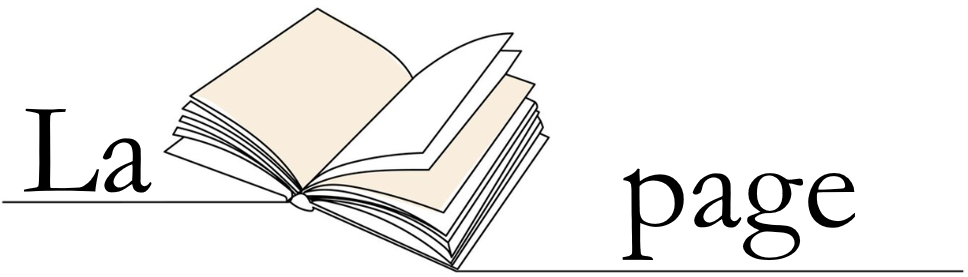

# Objectifs de ce notebook

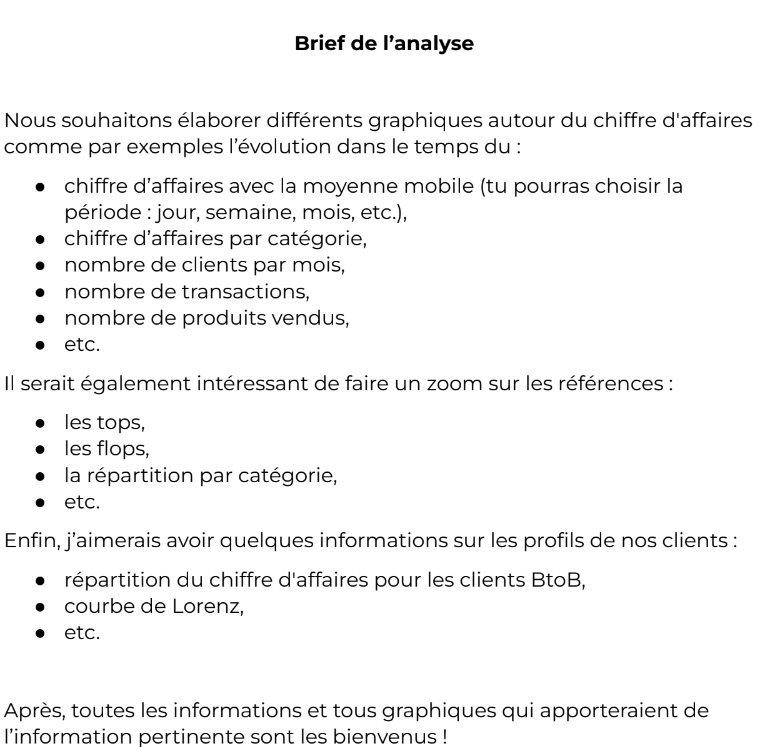

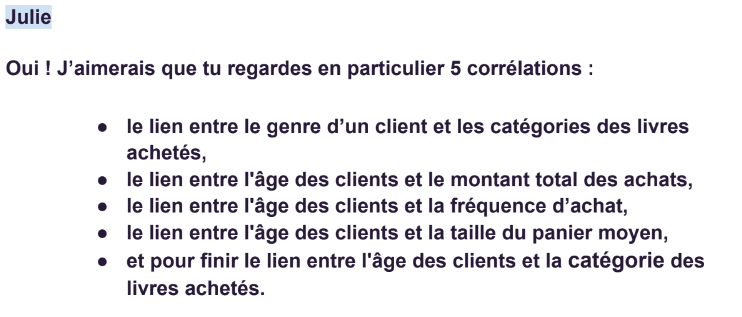

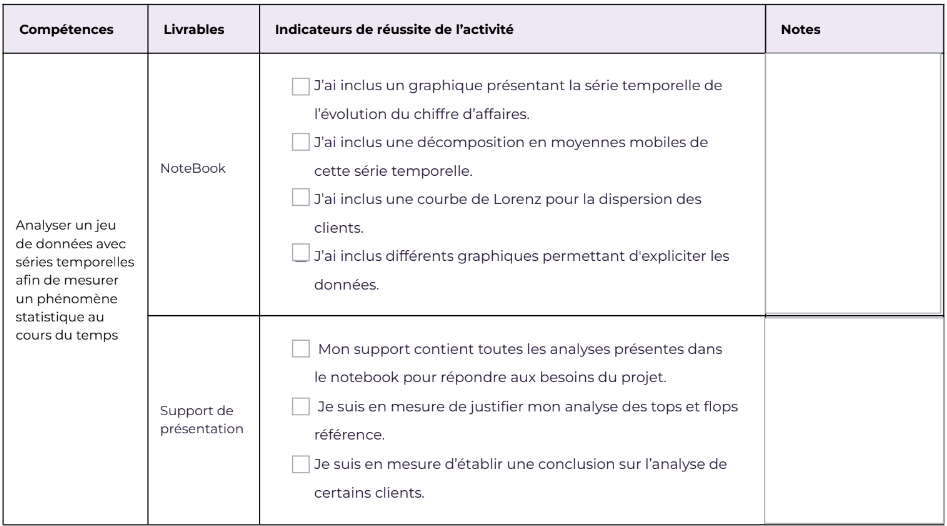

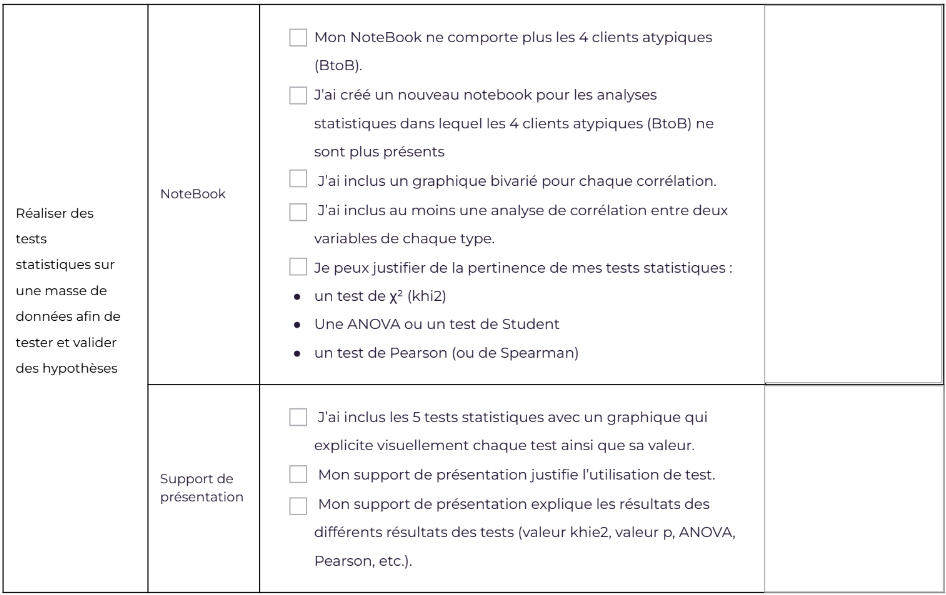

#**Sommaire**


#Phase 1 - Exploration et fusion des données


*   Étape 1 - Importation des librairies et chargement des fichiers
*   Étape 2 - Analyse exploratoire des fichiers
*   Étape 3 - Jonction des fichiers
*   Étape 4 - Préparation du dataframe pour analyses


#Phase 2 - Analyses des données


*   Étape 5 - Analyses du Chiffre d'Affaires
*   Étape 6 - Analyses des ventes
*   Étape 7 - Analyses des catégories
*   Étape 8 - Analyses des clients
*   Étape 9 - Analyses bivariées
*   Bonus - RFM




#**Phase 1** - Nettoyage et agrégation des données

##**Etape 1** - Importation des librairies et chargement des fichiers

###**1.1** - Importation des librairies

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns


In [ ]:
# Instruction permettant d'afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)

###**1.2** - Chargements des fichiers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importation du fichier customers.csv
df_customers = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 9/customers.csv", sep=";")
# Importation du fichier products.csv
df_products = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 9/products.csv", sep=";")
# Importation du fichier transactions.csv
df_transactions = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 9/transactions.csv", sep=";")

<ipython-input-4-4d8d9a58bcaa>:6: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transactions = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 9/transactions.csv", sep=";")


##**Etape 2** - Analyse exploratoire des fichiers

###**2.1** - Analyse exploratoire du fichier transactions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


<Axes: >

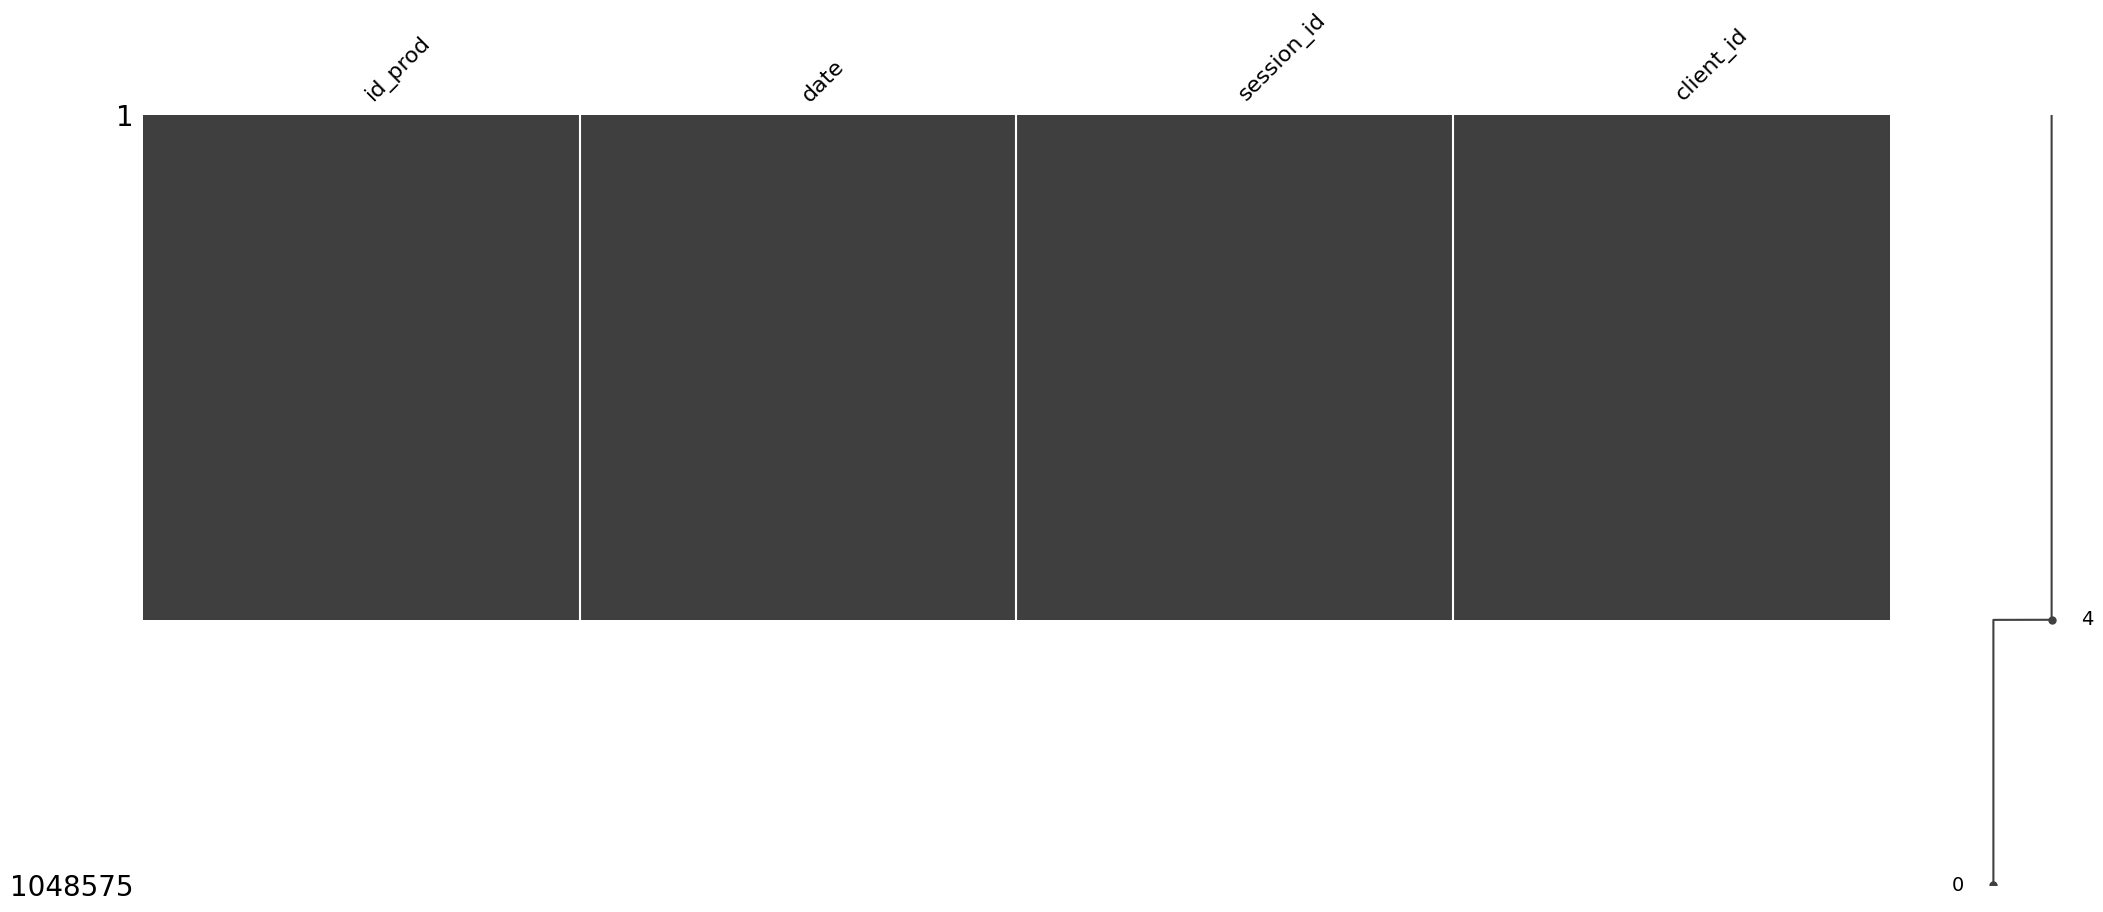

In [ ]:
df_transactions.info()
msno.matrix(df_transactions)

In [ ]:
# Supression des lignes vides
df_transactions.dropna(how='all', inplace=True)

Il y a **687 534** transactions enregistrées dans le fichier, on retrouve l'**id du produit**, l'**id du client**, l'**id de la session d'achat** ainsi que la **date de la transaction**.

###**2.2** - Analyse exploratoire du fichier products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


<Axes: >

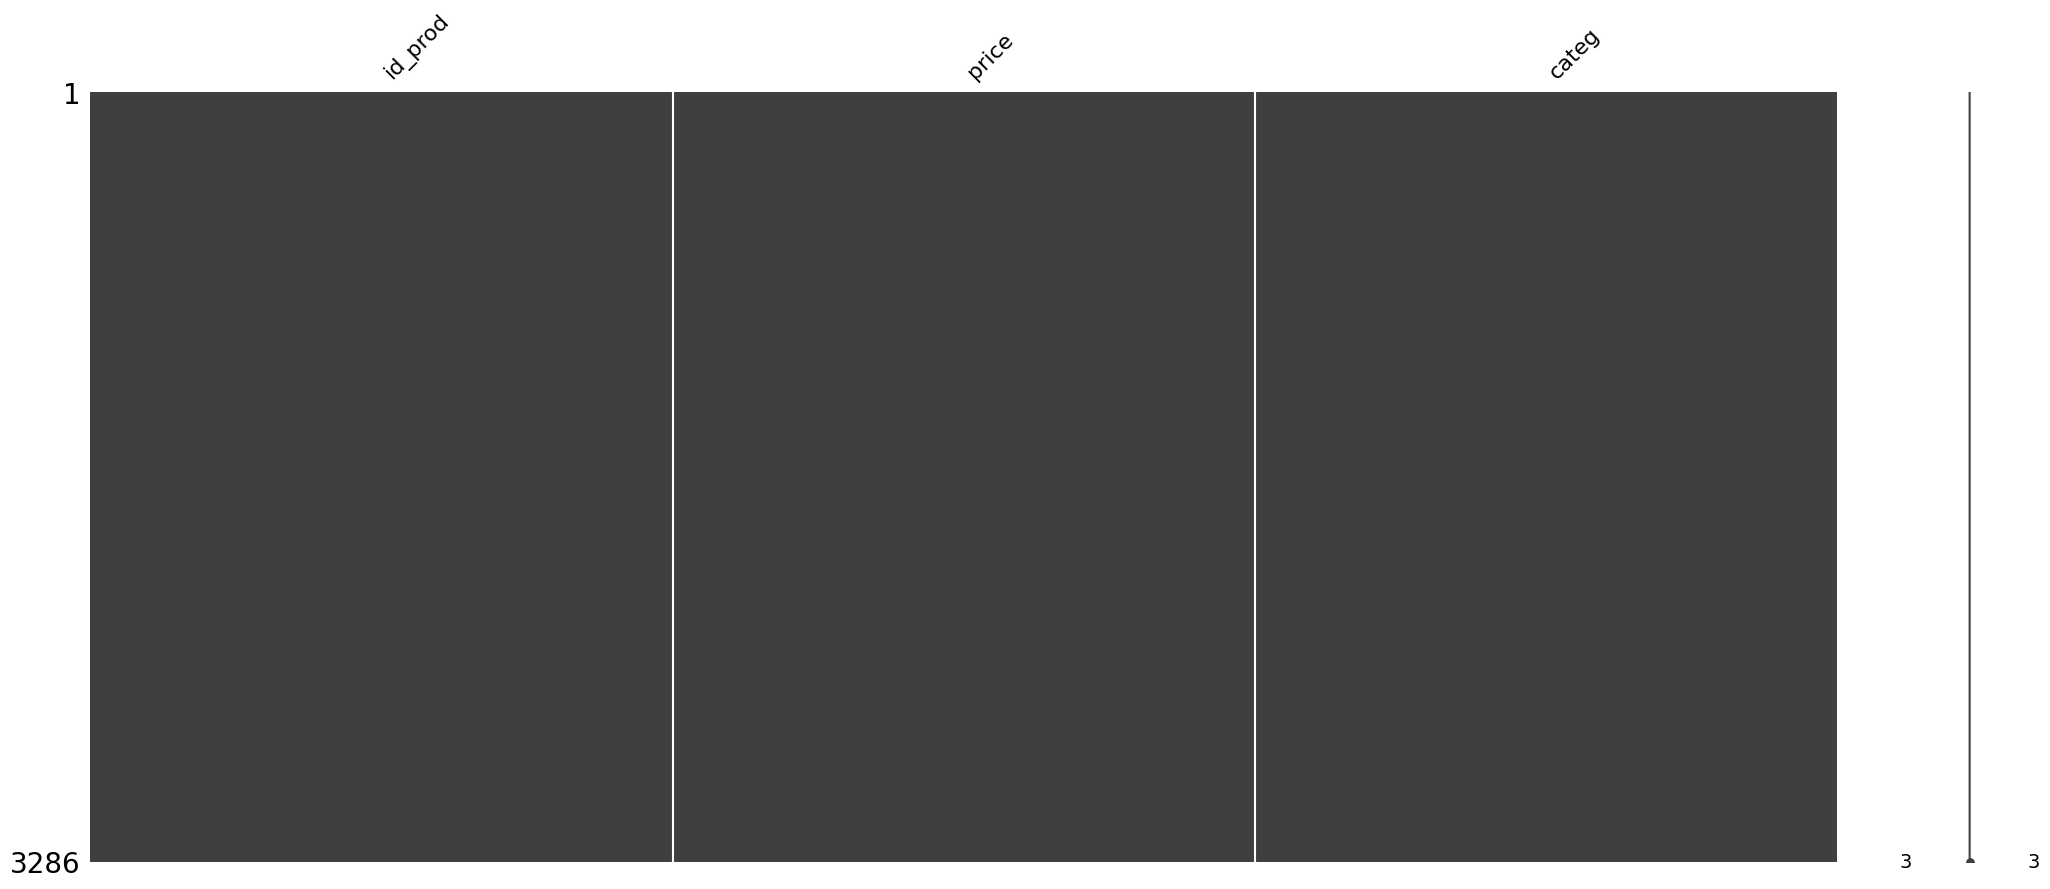

In [ ]:
df_products.info()
msno.matrix(df_products)

In [ ]:
# Vérification de l'unicité des id_prod
product_unique = df_products['id_prod'].is_unique
product_unique

True

**3286** références dans le catalogue, l'**id du produit**, son **prix** ainsi que sa **catégorie** composent ce fichier.

###**2.3** - Analyse exploratoire du fichier customers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


<Axes: >

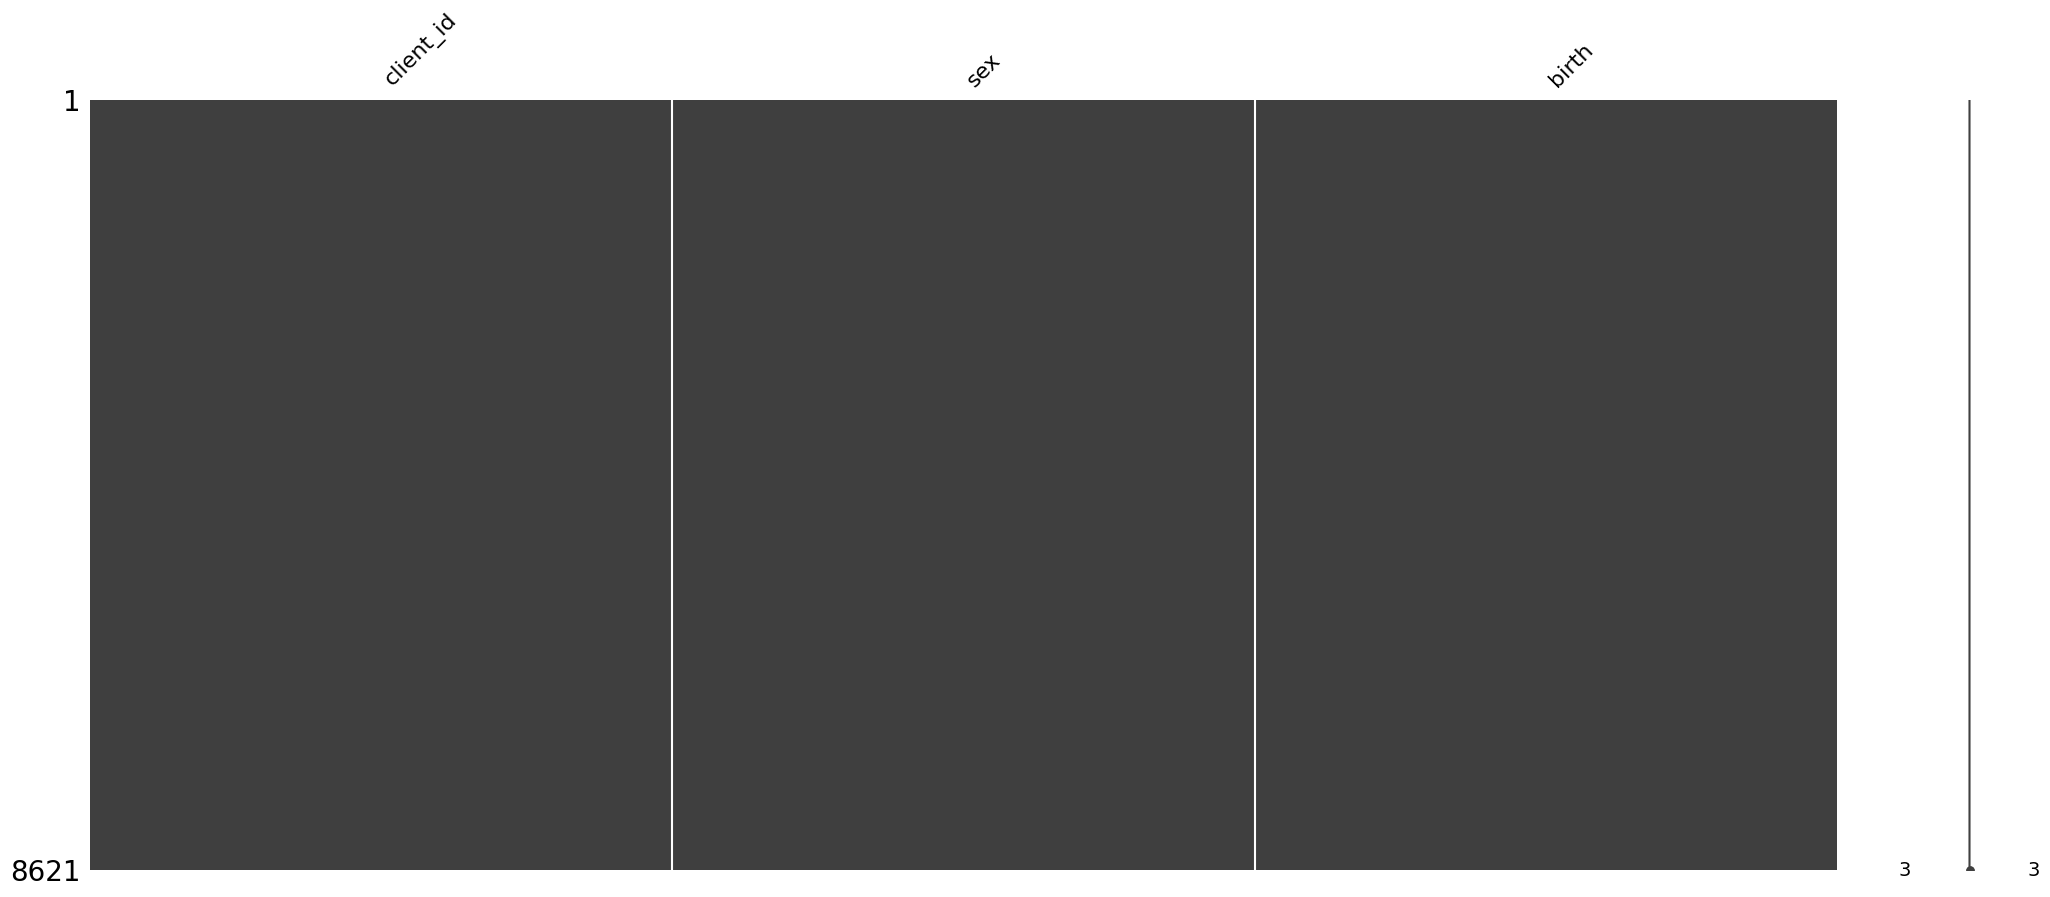

In [ ]:
df_customers.info()
msno.matrix(df_customers)

In [ ]:
# Vérification de l'unicité des client_id
client_unique = df_customers['client_id'].is_unique
client_unique

True

**8621** clients dans ce fichier, nous retrouvons l'**id du client**, son **sexe** ainsi que **son année de naissance**.

##**Etape 3** - Jonction des fichiers

###**3.1** - Jonction de transactions et products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687555 entries, 0 to 687554
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687555 non-null  object 
 1   date        687534 non-null  object 
 2   session_id  687534 non-null  object 
 3   client_id   687534 non-null  object 
 4   price       687555 non-null  float64
 5   categ       687555 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 31.5+ MB


<Axes: >

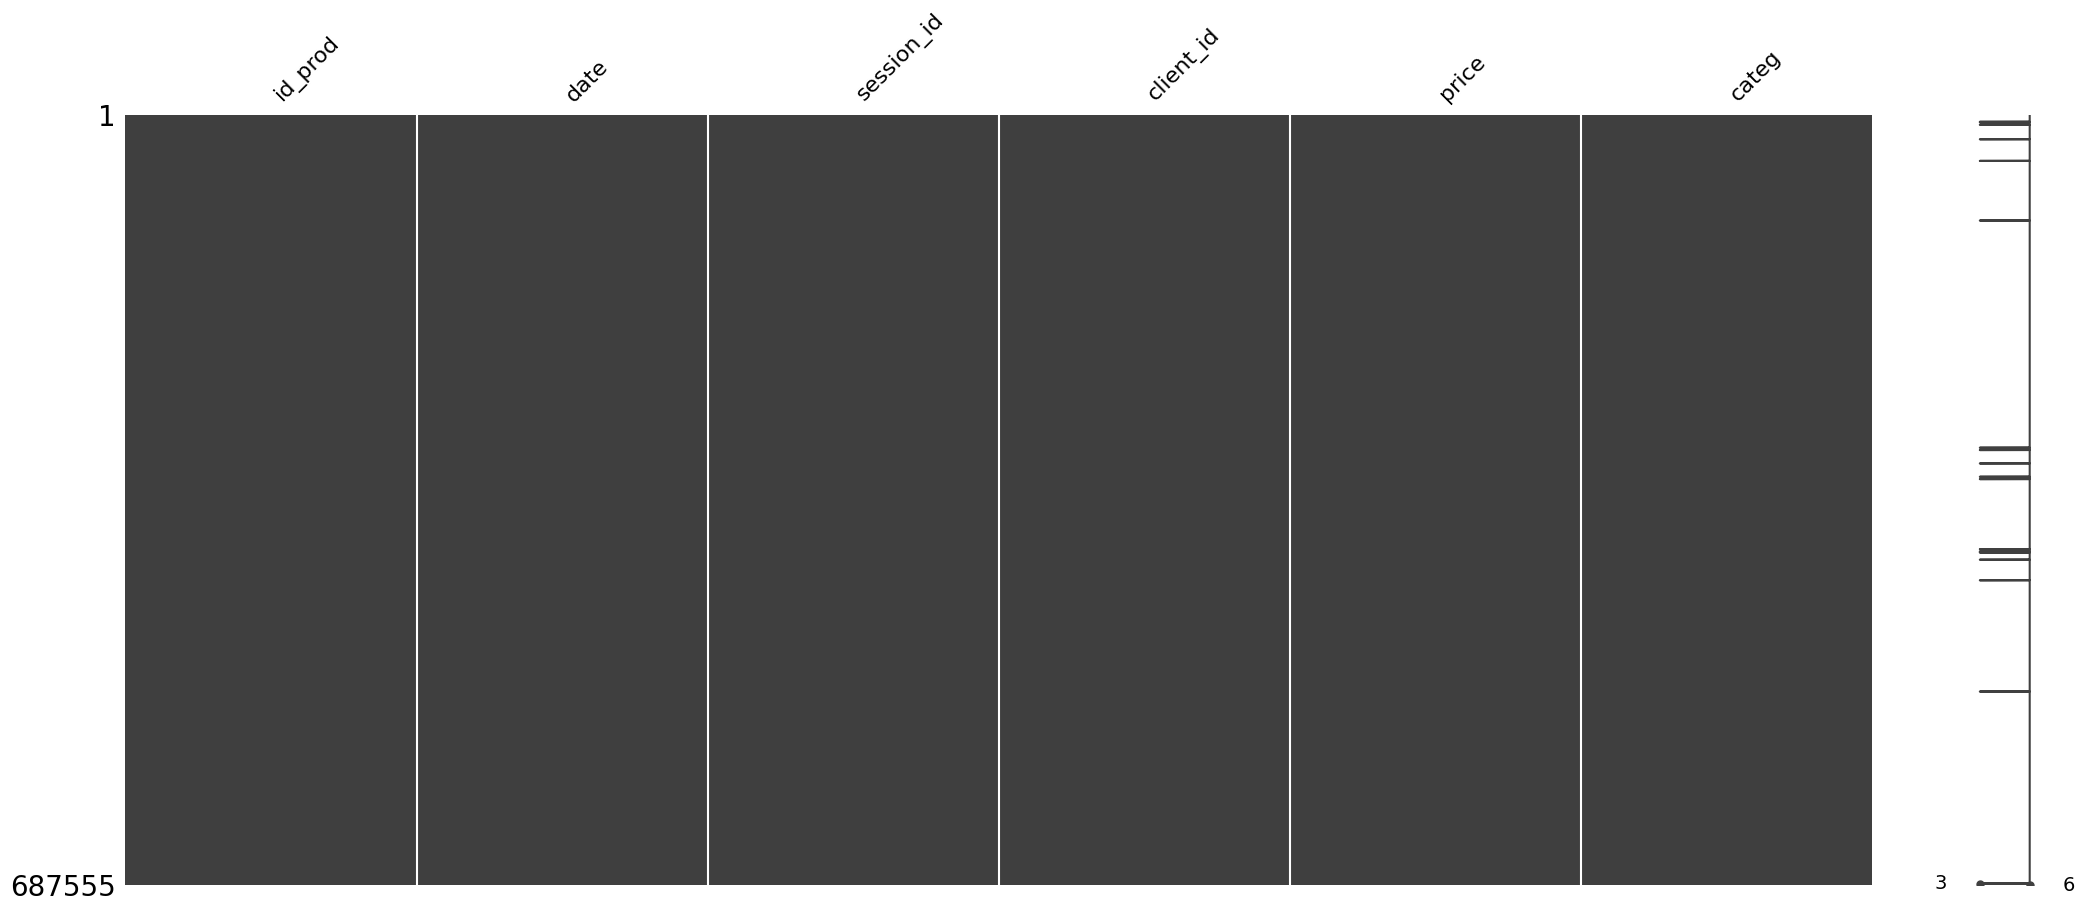

In [ ]:
df_lapage = pd.merge(df_transactions, df_products, on=['id_prod'], how='outer')
df_lapage.info()
msno.matrix(df_lapage)

In [ ]:
df_prod_null = df_lapage[df_lapage.isnull().any(axis=1)]
df_prod_null

,id_prod,date,session_id,client_id,price,categ
6073,0_1014,NaN,NaN,NaN,1.15,0
6511,0_1016,NaN,NaN,NaN,35.06,0
8723,0_1025,NaN,NaN,NaN,24.99,0
21687,0_1062,NaN,NaN,NaN,20.08,0
40971,0_1119,NaN,NaN,NaN,2.99,0
94245,0_1318,NaN,NaN,NaN,20.92,0
297077,0_1620,NaN,NaN,NaN,0.80,0
299185,0_1624,NaN,NaN,NaN,24.50,0
311123,0_1645,NaN,NaN,NaN,2.99,0
323013,0_1780,NaN,NaN,NaN,1.67,0


**21** références n'ont pas généré de ventes sur toute la période de l'analyse.

In [ ]:
df_lapage.dropna(inplace=True)
df_lapage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687554
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687534 non-null  object 
 1   date        687534 non-null  object 
 2   session_id  687534 non-null  object 
 3   client_id   687534 non-null  object 
 4   price       687534 non-null  float64
 5   categ       687534 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 36.7+ MB


###**3.2** - Jonction de merge et customers

In [ ]:
df_lapage = pd.merge(df_lapage, df_customers, on=['client_id'], how='outer')
df_lapage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687555 entries, 0 to 687554
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687534 non-null  object 
 1   date        687534 non-null  object 
 2   session_id  687534 non-null  object 
 3   client_id   687555 non-null  object 
 4   price       687534 non-null  float64
 5   categ       687534 non-null  float64
 6   sex         687555 non-null  object 
 7   birth       687555 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 42.0+ MB


In [ ]:
df_client_null = df_lapage[df_lapage.isnull().any(axis=1)]
df_client_null

,id_prod,date,session_id,client_id,price,categ,sex,birth
18399,NaN,NaN,NaN,c_1223,NaN,NaN,m,1963
167262,NaN,NaN,NaN,c_2706,NaN,NaN,f,1967
191551,NaN,NaN,NaN,c_3017,NaN,NaN,f,1992
225851,NaN,NaN,NaN,c_3443,NaN,NaN,m,1959
240172,NaN,NaN,NaN,c_3526,NaN,NaN,m,1956
261001,NaN,NaN,NaN,c_3789,NaN,NaN,f,1997
282271,NaN,NaN,NaN,c_4086,NaN,NaN,f,1992
305952,NaN,NaN,NaN,c_4358,NaN,NaN,m,1999
309172,NaN,NaN,NaN,c_4406,NaN,NaN,f,1998
312791,NaN,NaN,NaN,c_4447,NaN,NaN,m,1956


**21** clients n'ont rien acheté sur toute la période de l'analyse.

In [ ]:
df_lapage.dropna(inplace=True)
df_lapage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687554
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687534 non-null  object 
 1   date        687534 non-null  object 
 2   session_id  687534 non-null  object 
 3   client_id   687534 non-null  object 
 4   price       687534 non-null  float64
 5   categ       687534 non-null  float64
 6   sex         687534 non-null  object 
 7   birth       687534 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 47.2+ MB


##**Etape 4** - Préparation du dataframe pour analyses

In [ ]:
# Création d'une colonne age et supression de la colonne birth
df_lapage['age'] = 2024 - df_lapage['birth']
df_lapage.drop('birth', axis=1, inplace=True)
df_lapage.head()

,id_prod,date,session_id,client_id,price,categ,sex,age
0,0_1090,2021-12-19 02:44:12.827475,s_136532,c_1,13.78,0.0,m,69
1,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0.0,m,69
2,0_1186,2022-08-25 12:17:34.446678,s_258252,c_1,12.30,0.0,m,69
3,0_1378,2021-08-23 16:56:15.401655,s_79696,c_1,13.96,0.0,m,69
4,0_1378,2022-07-23 16:56:15.401655,s_242617,c_1,13.96,0.0,m,69


In [ ]:
# Définir les tranches d'âge
bins = [18, 26, 36, 46, 56, 66, 76, 100]  # Ajustement des bornes pour inclure les âges souhaités
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']

# Ajouter une nouvelle colonne pour les tranches d'âge
df_lapage['tranche_age'] = pd.cut(df_lapage['age'], bins=bins, labels=labels, right=False)

In [ ]:
# Renommer la colonne 'date' en 'date_heure'
df_lapage = df_lapage.rename(columns={'date': 'date_heure'})

# Convertir 'date_heure' en datetime si ce n'est pas déjà fait
df_lapage['date_heure'] = pd.to_datetime(df_lapage['date_heure'], errors='coerce')

# Extraire la composante date et créer une nouvelle colonne 'date' au format datetime
df_lapage['date'] = df_lapage['date_heure'].dt.date

# Reconvertir 'date' en datetime pour l'utiliser avec d'autres composants temporels
df_lapage['date'] = pd.to_datetime(df_lapage['date'])

# Extraction des composantes temporelles
df_lapage['annee'] = df_lapage['date'].dt.year  # Année
df_lapage['mois'] = df_lapage['date'].dt.month  # Mois
df_lapage['jour'] = df_lapage['date'].dt.day  # Jour

In [ ]:
# Réorganisation des colonnes
new_ordre = ['date_heure', 'date', 'annee', 'mois', 'jour', 'id_prod', 'price', 'categ', 'session_id', 'client_id', 'sex', 'age', 'tranche_age']
df_lapage = df_lapage[new_ordre]

In [ ]:
# Modification du type de categ
df_lapage['categ'] = df_lapage['categ'].astype('int64')
df_lapage['categ'] = df_lapage['categ'].astype('object')

In [ ]:
df_lapage.head()

,date_heure,date,annee,mois,jour,id_prod,price,categ,session_id,client_id,sex,age,tranche_age
0,2021-12-19 02:44:12.827475,2021-12-19,2021,12,19,0_1090,13.78,0,s_136532,c_1,m,69,66-75
1,2021-07-25 12:17:34.446678,2021-07-25,2021,7,25,0_1186,12.30,0,s_66947,c_1,m,69,66-75
2,2022-08-25 12:17:34.446678,2022-08-25,2022,8,25,0_1186,12.30,0,s_258252,c_1,m,69,66-75
3,2021-08-23 16:56:15.401655,2021-08-23,2021,8,23,0_1378,13.96,0,s_79696,c_1,m,69,66-75
4,2022-07-23 16:56:15.401655,2022-07-23,2022,7,23,0_1378,13.96,0,s_242617,c_1,m,69,66-75


date_heure :

Description : Horodatage précis de l'achat avec la date et l'heure (y compris les millisecondes).
Exemple : 2021-12-19 02:44:12.827475.
date :

Description : Date de l'achat au format AAAA-MM-JJ, extraite de date_heure.
Exemple : 2021-12-19.
annee :

Description : Année de l'achat.
Exemple : 2021.
mois :

Description : Mois de l'achat (1 à 12).
Exemple : 12.
jour :

Description : Jour du mois où l'achat a été effectué.
Exemple : 19.
id_prod :

Description : Identifiant unique du produit acheté.
Exemple : 0_1090.
price :

Description : Prix du produit lors de l'achat, en euros.
Exemple : 13.78.
categ :

Description : Catégorie du produit (numérique).
Exemple : 0.
session_id :

Description : Identifiant unique de la session d'achat, regroupant potentiellement plusieurs produits achetés par un client lors d'une même session.
Exemple : s_136532.
client_id :

Description : Identifiant unique du client ayant effectué l'achat.
Exemple : c_1.
sex :

Description : Sexe du client (m : masculin, f : féminin).
Exemple : m.
age :

Description : Âge du client au moment de l'achat.
Exemple : 69.
tranche_age :

Description : Tranche d'âge du client (groupée par intervalles de 10 ans).
Exemple : 66-75.
En résumé :
Ce DataFrame contient des données transactionnelles détaillées, incluant des informations sur les produits achetés (identifiant, prix, catégorie), les clients (identifiant, sexe, âge), ainsi que les détails temporels de l'achat (date, heure, session).

#**Phase 2** - Analyses des données

##**Etape 5** - Analyses du Chiffre d'affaires

### Chiffre d'affaires total

In [ ]:
# Calcul du CA total
ca_total = df_lapage['price'].sum()
display(ca_total)

12027663.100000001

In [ ]:
# Calcul du CA par an
ca_par_an = df_lapage.groupby('annee')['price'].sum().reset_index()

# Renommer les colonnes pour plus de clarté
ca_par_an.columns = ['Année', 'Chiffre d\'Affaires']
print(ca_par_an)

   Année  Chiffre d'Affaires
0   2021          4944760.98
1   2022          6108681.81
2   2023           974220.31


Les données de 2021 débutant en mars et celles de 2023 ne couvrant que les deux premiers mois, il est difficile de tirer une analyse comparative complète sur ces années.

### Évolution du Chiffre d'affaires

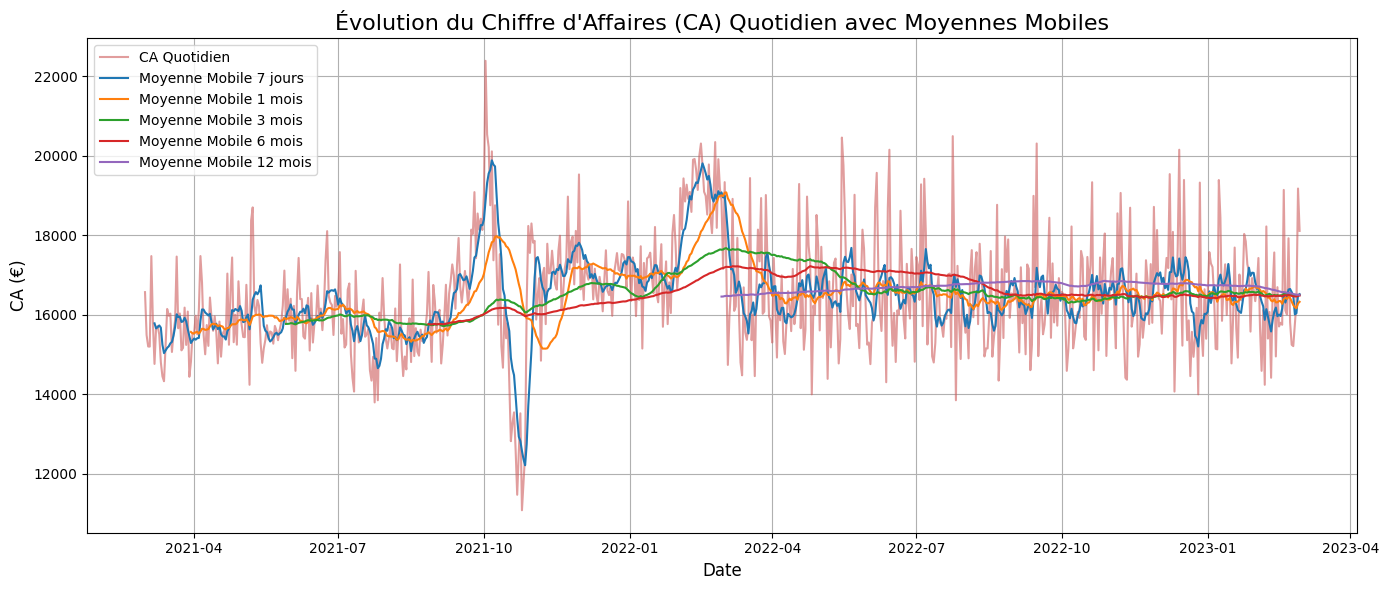

In [ ]:
# Groupby sur 'date' pour obtenir le CA par jour
ca_par_jour = df_lapage.groupby('date')['price'].sum().reset_index()

# Calcul des moyennes mobiles sur différentes périodes
ca_par_jour['MM_7j'] = ca_par_jour['price'].rolling(window=7).mean()
ca_par_jour['MM_1mois'] = ca_par_jour['price'].rolling(window=30).mean()  # 30 jours pour 1 mois
ca_par_jour['MM_3mois'] = ca_par_jour['price'].rolling(window=90).mean()  # 90 jours pour 3 mois
ca_par_jour['MM_6mois'] = ca_par_jour['price'].rolling(window=180).mean()  # 180 jours pour 6 mois
ca_par_jour['MM_12mois'] = ca_par_jour['price'].rolling(window=365).mean()  # 365 jours pour 12 mois

# Affichage de l'évolution du CA par jour avec les courbes de moyennes mobiles
plt.figure(figsize=(14, 6))

# Tracer le CA quotidien
plt.plot(ca_par_jour['date'], ca_par_jour['price'], color='indianred', alpha=0.6, label='CA Quotidien')

# Couleurs contrastées pour les moyennes mobiles
plt.plot(ca_par_jour['date'], ca_par_jour['MM_7j'], color='#1f77b4', label='Moyenne Mobile 7 jours')   # Bleu moyen
plt.plot(ca_par_jour['date'], ca_par_jour['MM_1mois'], color='#ff7f0e', label='Moyenne Mobile 1 mois')  # Orange moyen
plt.plot(ca_par_jour['date'], ca_par_jour['MM_3mois'], color='#2ca02c', label='Moyenne Mobile 3 mois')  # Vert
plt.plot(ca_par_jour['date'], ca_par_jour['MM_6mois'], color='#d62728', label='Moyenne Mobile 6 mois')  # Rouge foncé
plt.plot(ca_par_jour['date'], ca_par_jour['MM_12mois'], color='#9467bd', label='Moyenne Mobile 12 mois')  # Violet moyen

# Ajout des labels et du titre
plt.title("Évolution du Chiffre d'Affaires (CA) Quotidien avec Moyennes Mobiles", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("CA (€)", fontsize=12)
plt.grid(True)

# Ajout de la légende
plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

Les moyennes mobiles mettent en évidence une stabilité globale du chiffre d'affaires tout au long de la période, sans signe apparent de saisonnalité. On observe toutefois des pics entre la fin 2021 et le début 2022.

In [ ]:
# Création des tranches de 12 mois : de mars à février
df_lapage['periode'] = ((df_lapage['annee'] - 2021) * 12 + df_lapage['mois'] - 3) // 12 + 1

# Calcul du CA par période
ca_par_periode = df_lapage.groupby('periode')['price'].sum().reset_index()

# Calcul de l'évolution du CA entre chaque période (en pourcentage)
ca_par_periode['evolution_CA'] = ca_par_periode['price'].pct_change() * 100

# Remplacer la valeur NaN de la première période par 0 (ou une autre valeur, si tu préfères)
ca_par_periode['evolution_CA'] = ca_par_periode['evolution_CA'].fillna(0)

# Affichage des résultats
print(ca_par_periode)

   periode       price  evolution_CA
0        1  6005671.47      0.000000
1        2  6021991.63      0.271746


L'évolution du chiffre d'affaires de 0,27 % sur 12 mois glissants reflète une croissance modeste, suggérant une tendance stable sur la période analysée.

###Évolution du CA par Catégorie

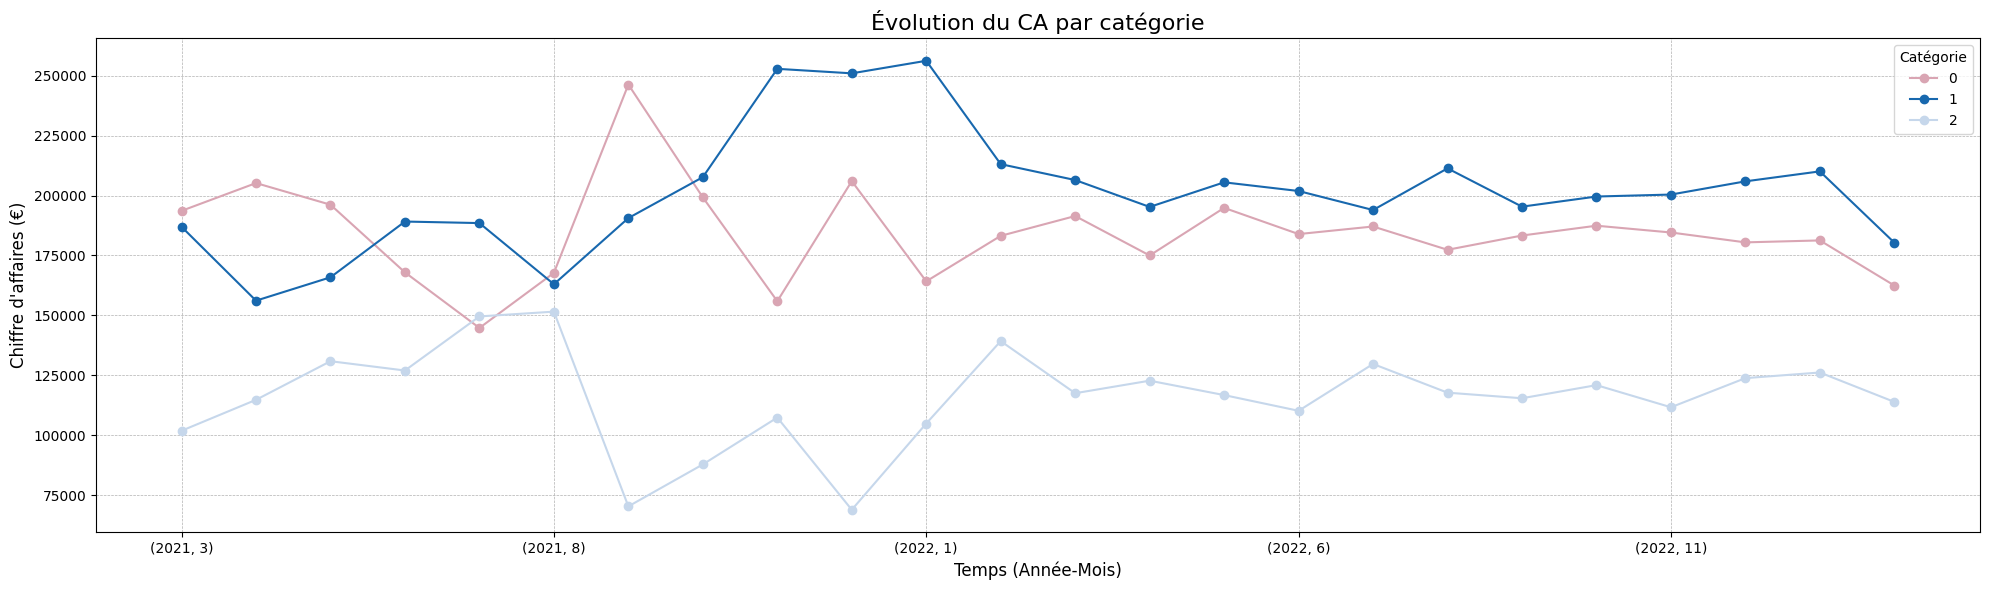

In [ ]:
# Agrégation des ventes par mois et catégorie
ventes_par_categ = df_lapage.groupby(["annee", "mois", "categ"])["price"].sum().unstack()

# Création du line chart pour visualiser les ventes par mois et par catégorie
ventes_par_categ.plot(kind='line', figsize=(20, 6), color=['#d9a5b3', '#1868ae', '#c6d7eb'], marker='o')

# Ajout des labels et du titre
plt.xlabel("Temps (Année-Mois)", fontsize=12)
plt.ylabel("Chiffre d'affaires (€)", fontsize=12)
plt.title("Évolution du CA par catégorie", fontsize=16)

# Ajout de la légende pour chaque catégorie
plt.legend(title="Catégorie", fontsize=10)

# Ajout d'une grille
plt.grid(True, linestyle='--', linewidth=0.5)

# Ajustement des espacements
plt.tight_layout()

# Affichage du graphique
plt.show()

On observe une linéarité générale dans l'évolution du chiffre d'affaires de chaque catégorie, sans avoir besoin de moyennes mobiles, à l'exception de pics entre fin 2021 et début 2022. La catégorie 1 se situe au-dessus de la catégorie 0, tandis que la catégorie 2 est en bas, ce qui reflète des disparités dans les performances de chaque catégorie.

<ipython-input-28-5a4b0a160125>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lapage, y='categ', x='price', orient='h', showfliers=False, showmeans=True,


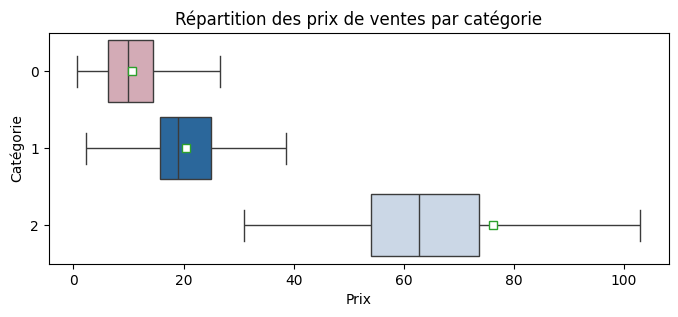

In [ ]:
# Définir la taille du graphique
plt.figure(figsize=(8,3))

# Création d'un boxplot pour visualiser la répartition des prix par catégorie
sns.boxplot(data=df_lapage, y='categ', x='price', orient='h', showfliers=False, showmeans=True,
            palette=['#d9a5b3', '#1868ae', '#c6d7eb'], meanprops={"marker":"s", "markerfacecolor":"white"})

# Ajout des labels et titre
plt.xlabel('Prix')
plt.ylabel('Catégorie')
plt.title('Répartition des prix de ventes par catégorie')

# Affichage du graphique
plt.show()

In [ ]:
# Calcul du prix moyen par catégorie
prix_moyen_par_categ = df_lapage.groupby('categ')['price'].mean().reset_index()

# Renommer la colonne pour que le prix moyen soit le titre
prix_moyen_par_categ.columns = ['Catégorie', 'Prix moyen (€)']

# Affichage en tableau
display(prix_moyen_par_categ)

,Catégorie,Prix moyen (€)
0,0,10.638188
1,1,20.491600
2,2,76.207412


La catégorie 1, générant le plus de chiffre d'affaires, se situe entre les deux autres catégories en termes de prix moyen des livres, avec un prix moyen de 20 €. Ce prix se rapproche de celui de la catégorie 0, qui regroupe des livres dont le prix de vente ne dépasse pas les 20 €. En revanche, la catégorie 2 regroupe des livres dits "premium", avec un prix moyen de 76 €, se distinguant ainsi par son positionnement haut de gamme.

###TOP et FLOP références (chiffre d'affaires)

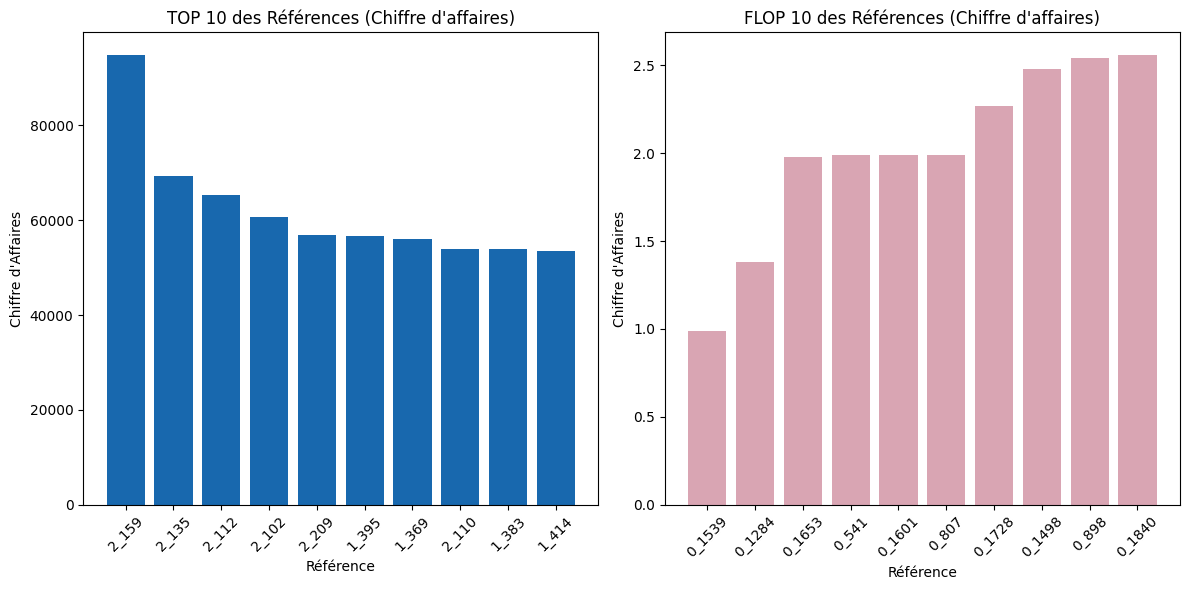

In [ ]:
# Calcul du CA par référence (id_prod)
ca_par_ref = df_lapage.groupby('id_prod')['price'].sum().reset_index()

# Renommer les colonnes pour plus de clarté
ca_par_ref.columns = ['Référence', 'Chiffre d\'Affaires']

# Trier par chiffre d'affaires décroissant (TOP 10) et croissant (FLOP 10)
top_10 = ca_par_ref.sort_values(by='Chiffre d\'Affaires', ascending=False).head(10)
flop_10 = ca_par_ref.sort_values(by='Chiffre d\'Affaires', ascending=True).head(10)

# Création du graphique
plt.figure(figsize=(12, 6))

# Bar chart pour le TOP 10
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er graphique
plt.bar(top_10['Référence'], top_10['Chiffre d\'Affaires'], color='#1868ae')
plt.title("TOP 10 des Références (Chiffre d'affaires)")
plt.xlabel('Référence')
plt.ylabel('Chiffre d\'Affaires')
plt.xticks(rotation=45)

# Bar chart pour le FLOP 10
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2ème graphique
plt.bar(flop_10['Référence'], flop_10['Chiffre d\'Affaires'], color='#d9a5b3')
plt.title("FLOP 10 des Références (Chiffre d'affaires)")
plt.xlabel('Référence')
plt.ylabel('Chiffre d\'Affaires')
plt.xticks(rotation=45)

# Ajustements
plt.tight_layout()
plt.show()

**TOP** : Les produits de la catégorie 2 (premium) génèrent un chiffre d'affaires plus élevé grâce à leur prix supérieur, suivis de près par ceux de la catégorie 1, qui, malgré un prix moyen bien inférieur, réalisent un chiffre d'affaires presque équivalent.

**FLOP** : On ne retrouve que la catégorie 0, malgré des prix d'entrée attractifs, ces produits n'ont pas rencontré un grand succès en termes de ventes.
**Nous ne comptons pas ici les 21 produits qui n'ont généré aucune vente.**

### TOP Clients (Chiffre d'affaires)

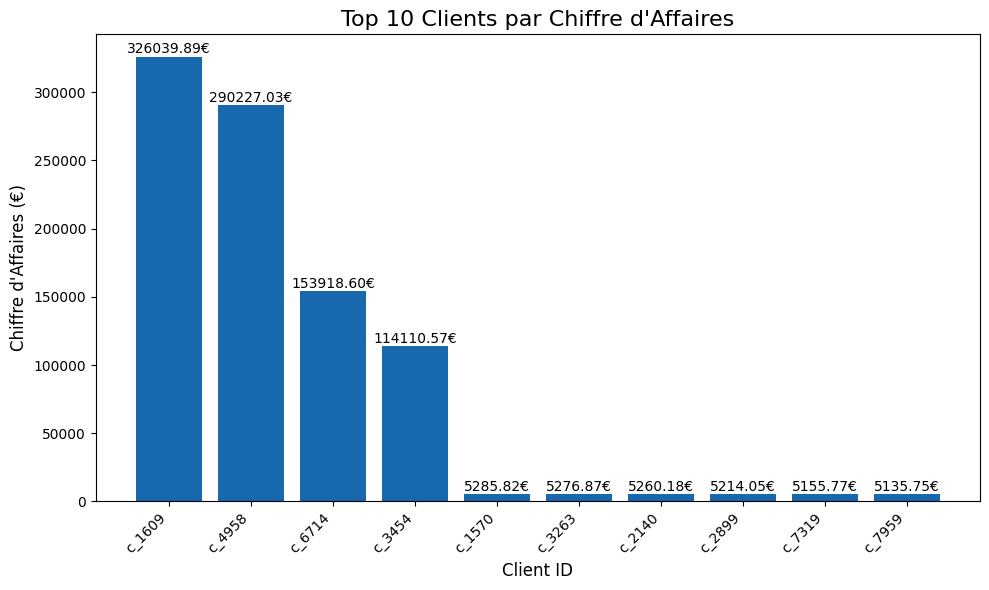

In [ ]:
# Calcul du CA par client
ca_par_client = df_lapage.groupby('client_id')['price'].sum().reset_index()

# Renommer les colonnes pour plus de clarté
ca_par_client.columns = ['Client ID', 'Chiffre d\'Affaires']

# Trier par chiffre d'affaires décroissant et sélectionner les 10 premiers clients
ca_par_client_sorted = ca_par_client.sort_values(by='Chiffre d\'Affaires', ascending=False).head(10)

# Création du bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(ca_par_client_sorted['Client ID'], ca_par_client_sorted['Chiffre d\'Affaires'], color='#1868ae')

# Ajouter le chiffre d'affaires au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f'{yval:.2f}€', ha='center', va='bottom', fontsize=10)

# Ajouter les labels et le titre
plt.xlabel("Client ID", fontsize=12)
plt.ylabel("Chiffre d'Affaires (€)", fontsize=12)
plt.title("Top 10 Clients par Chiffre d'Affaires", fontsize=16)

# Ajuster la disposition du graphique
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()

 les quatre premiers clients (c_3454, c_6714, c_4958, et c_1609) sont des clients BtoB, dont les chiffres d'affaires sont significativement plus élevés, atteignant jusqu'à 326039,89 €. Cela reflète probablement des achats en grande quantité ou des contrats plus importants, contribuant de manière notable au chiffre d'affaires global.

###Lorenz CA / Client

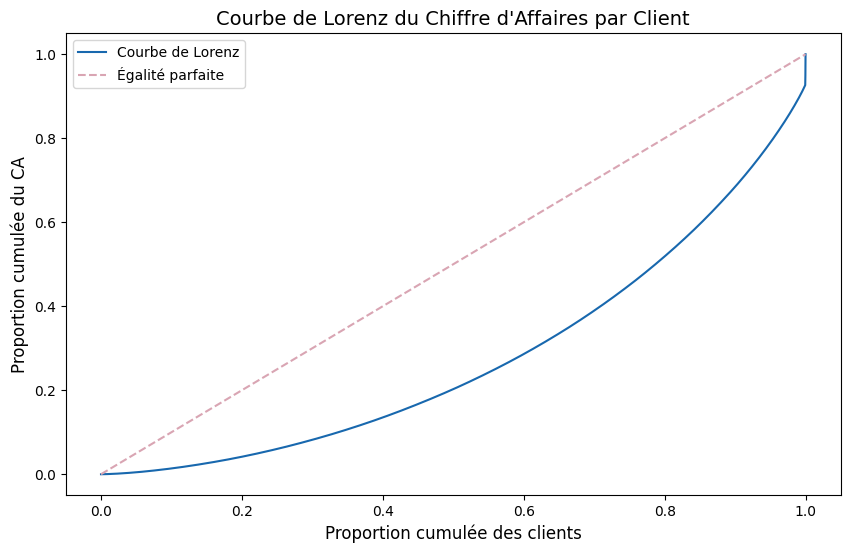

Indice de Gini : 0.4418309766423504


In [ ]:
# Calcul du CA par client
ca_par_client = df_lapage.groupby('client_id')['price'].sum()

# Trier les clients par CA
ca_par_client_sorted = ca_par_client.sort_values()

# Calculer la somme cumulée du CA et la somme totale du CA
ca_cumsum = ca_par_client_sorted.cumsum()
ca_total = ca_par_client_sorted.sum()

# Calculer la proportion cumulée des clients et du CA
proportion_clients = np.linspace(0, 1, len(ca_par_client_sorted))
proportion_ca = ca_cumsum / ca_total

# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(proportion_clients, proportion_ca, label='Courbe de Lorenz', color='#1868ae')
plt.plot([0, 1], [0, 1], linestyle='--', color='#d9a5b3', label='Égalité parfaite')

# Ajouter des labels et un titre
plt.title("Courbe de Lorenz du Chiffre d'Affaires par Client", fontsize=14)
plt.xlabel("Proportion cumulée des clients", fontsize=12)
plt.ylabel("Proportion cumulée du CA", fontsize=12)
plt.legend()

# Afficher la courbe
plt.show()

# Calcul de l'indice de Gini
AUC = np.trapz(proportion_ca, proportion_clients)  # Calcul de l'aire sous la courbe de Lorenz
indice_de_gini = 1 - 2 * AUC  # Formule pour obtenir l'indice de Gini

print(f"Indice de Gini : {indice_de_gini}")

Un indice de Gini de 0.4418 indique que la distribution du chiffre d'affaires parmi les clients est relativement inégale, mais pas excessive. Une partie du chiffre d'affaires est générée par une minorité de clients, tandis que la majorité génère moins de chiffre d'affaires.

### TOP Clients (Sans BtoB)

In [ ]:
# Liste des clients BtoB
client_id_btob = ["c_1609", "c_4958", "c_6714", "c_3454"]

# Création d'un nouveau DataFrame filtré
df_btob = df_lapage[df_lapage["client_id"].isin(client_id_btob)]

In [ ]:
# Création d'un nouveau DataFrame sans les clients de la liste
df_lapage_wo_btob = df_lapage[~df_lapage["client_id"].isin(client_id_btob)]

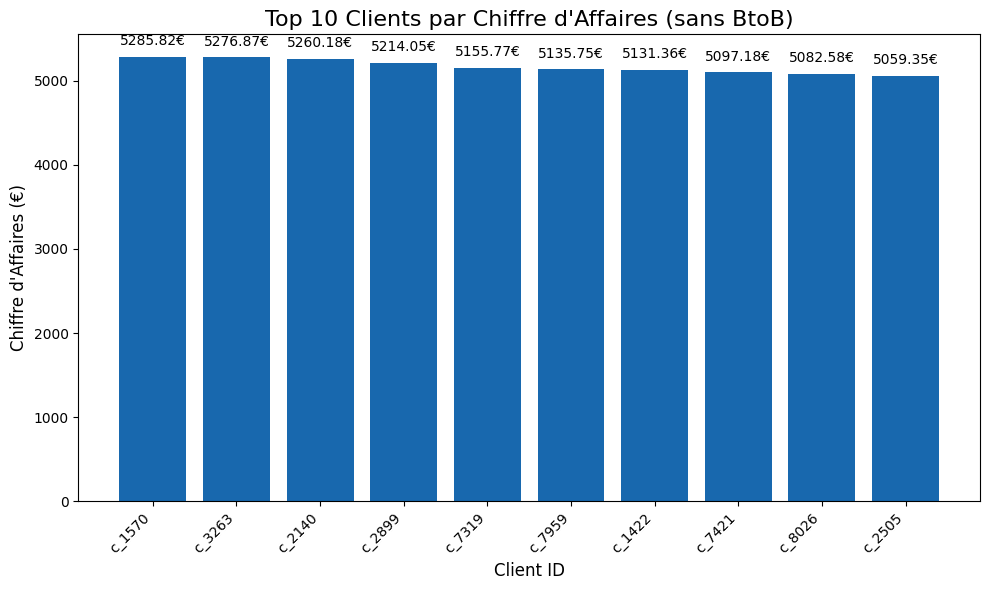

In [ ]:
# Calcul du CA par client
ca_par_client_wo_btob = df_lapage_wo_btob.groupby('client_id')['price'].sum().reset_index()

# Renommer les colonnes pour plus de clarté
ca_par_client_wo_btob.columns = ['Client ID', 'Chiffre d\'Affaires']

# Trier par chiffre d'affaires décroissant et sélectionner les 10 premiers clients
ca_par_client_wo_btob_sorted = ca_par_client_wo_btob.sort_values(by='Chiffre d\'Affaires', ascending=False).head(10)

# Création du bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(ca_par_client_wo_btob_sorted['Client ID'], ca_par_client_wo_btob_sorted['Chiffre d\'Affaires'], color='#1868ae')

# Ajouter le chiffre d'affaires au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f'{yval:.2f}€', ha='center', va='bottom', fontsize=10)

# Ajouter les labels et le titre
plt.xlabel("Client ID", fontsize=12)
plt.ylabel("Chiffre d'Affaires (€)", fontsize=12)
plt.title("Top 10 Clients par Chiffre d'Affaires (sans BtoB)", fontsize=16)

# Ajuster la disposition du graphique
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()

Le top 10 des clients, excluant les clients BtoB, présente des chiffres d'affaires assez homogènes, allant de 5059,35 € à 5285,82 €.

###Lorenz CA / Client (sans Btob)

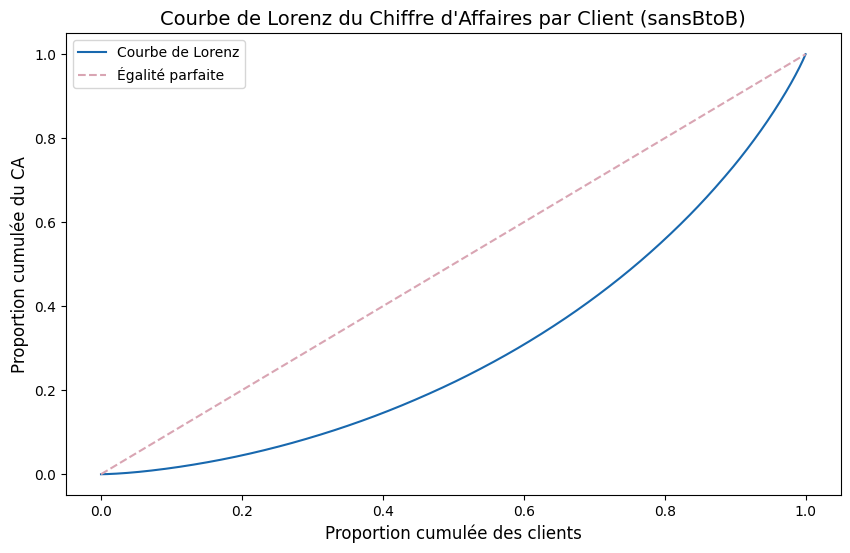

Indice de Gini : 0.3982160276983393


In [ ]:
# Calcul du CA par client
ca_par_client_wo_btob = df_lapage_wo_btob.groupby('client_id')['price'].sum()

# Trier les clients par CA
ca_par_client_wo_btob_sorted = ca_par_client_wo_btob.sort_values()

# Calculer la somme cumulée du CA et la somme totale du CA
ca_wo_btob_cumsum = ca_par_client_wo_btob_sorted.cumsum()
ca_wo_btob_total = ca_par_client_wo_btob_sorted.sum()

# Calculer la proportion cumulée des clients et du CA
proportion_clients_wo_btob = np.linspace(0, 1, len(ca_par_client_wo_btob_sorted))
proportion_ca_wo_btob = ca_wo_btob_cumsum / ca_wo_btob_total

# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(proportion_clients_wo_btob, proportion_ca_wo_btob, label='Courbe de Lorenz', color='#1868ae')
plt.plot([0, 1], [0, 1], linestyle='--', color='#d9a5b3', label='Égalité parfaite')

# Ajouter des labels et un titre
plt.title("Courbe de Lorenz du Chiffre d'Affaires par Client (sansBtoB)", fontsize=14)
plt.xlabel("Proportion cumulée des clients", fontsize=12)
plt.ylabel("Proportion cumulée du CA", fontsize=12)
plt.legend()

# Afficher la courbe
plt.show()

# Calcul de l'indice de Gini
AUC = np.trapz(proportion_ca_wo_btob, proportion_clients_wo_btob)  # Calcul de l'aire sous la courbe de Lorenz
indice_de_gini = 1 - 2 * AUC  # Formule pour obtenir l'indice de Gini

print(f"Indice de Gini : {indice_de_gini}")

l'inégalité est toujours présente, mais l'indice de Gini de 0.3982 montre que la situation est légèrement plus équilibrée par rapport à l'indice précédent (0.4418). Il y a une meilleure répartition des ventes parmi les clients.

###Chiffre d'affaires par Tranche d'âges (sans BtoB)

<ipython-input-37-e7938ed67f87>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ca_par_tranche_age = df_lapage_wo_btob.groupby('tranche_age')['price'].sum().sort_index()


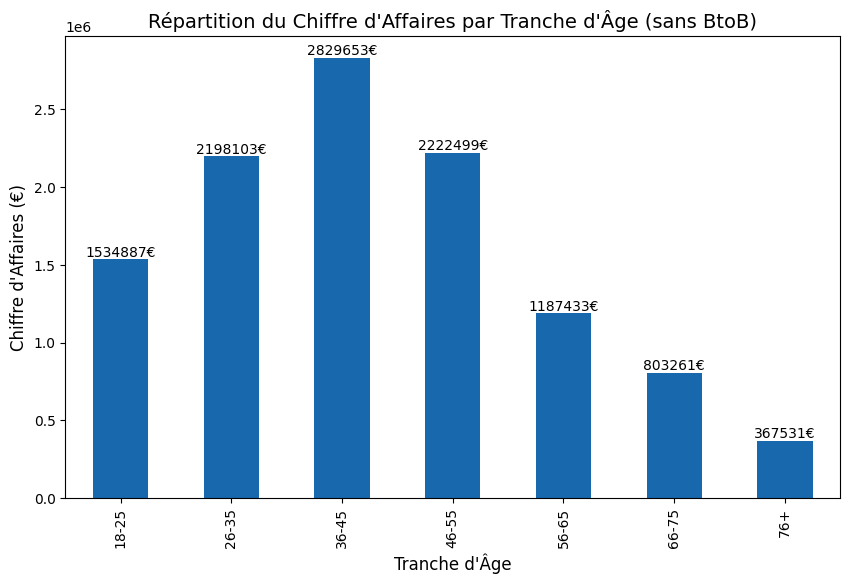

In [ ]:
plt.figure(figsize=(10, 6))

# Calcul du CA par tranche d'âge et tri croissant
ca_par_tranche_age = df_lapage_wo_btob.groupby('tranche_age')['price'].sum().sort_index()

# Création du bar chart
ax = ca_par_tranche_age.plot(kind='bar', color='#1868ae')

# Ajout des labels et du titre
plt.title("Répartition du Chiffre d'Affaires par Tranche d'Âge (sans BtoB)", fontsize=14)
plt.xlabel("Tranche d'Âge", fontsize=12)
plt.ylabel("Chiffre d'Affaires (€)", fontsize=12)

# Affichage des valeurs sur les barres
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, fmt='%.0f€')

# Afficher le graphique
plt.show()

Les tranches d'âge les plus productives en termes de chiffre d'affaires sont celles entre 36 et 55 ans, suivies des 26-35 ans. Les tranches d'âge plus élevées montrent une décroissance, ce qui est courant dans les comportements de consommation, car les jeunes adultes sont souvent plus enclins à acheter plus fréquemment et en plus grande quantité.

###Chiffre d'affaires par Sex (sans BtoB)

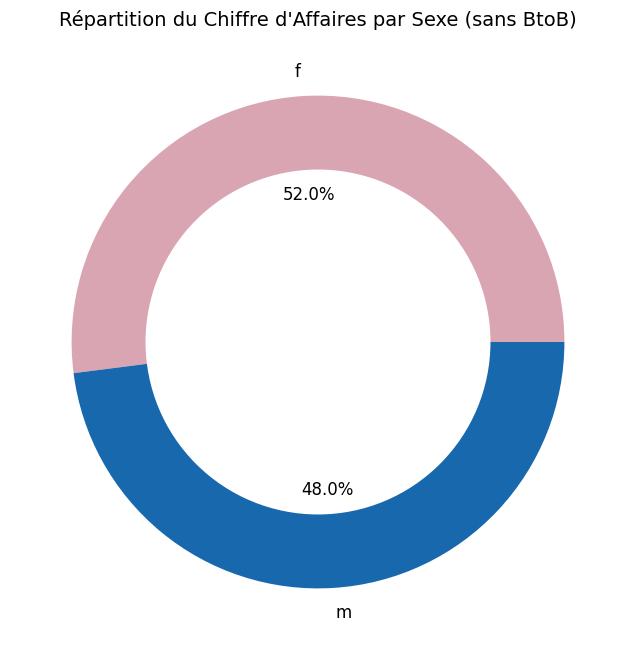

In [ ]:
plt.figure(figsize=(8, 8))

# Calcul du CA par sexe
ca_par_sex = df_lapage_wo_btob.groupby('sex')['price'].sum()

# Création du pie chart pour le CA par sexe
ax = ca_par_sex.plot(kind='pie', autopct='%1.1f%%', colors=['#d9a5b3', '#1868ae'],
                     textprops={'fontsize': 12, 'color': 'black'})

# Ajout d'un cercle pour donner un effet de "donut"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Retirer le cadre
ax.spines[:].set_visible(False)

# Retirer l'axe Y et X
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

# Ajout d'un titre
plt.title("Répartition du Chiffre d'Affaires par Sexe (sans BtoB)", fontsize=14)

# Afficher le graphique
plt.show()


 Les femmes génèrent un peu plus de chiffre d'affaires que les hommes dans l'ensemble, bien que la différence ne soit pas énorme.

###Lorenz CA / Produit

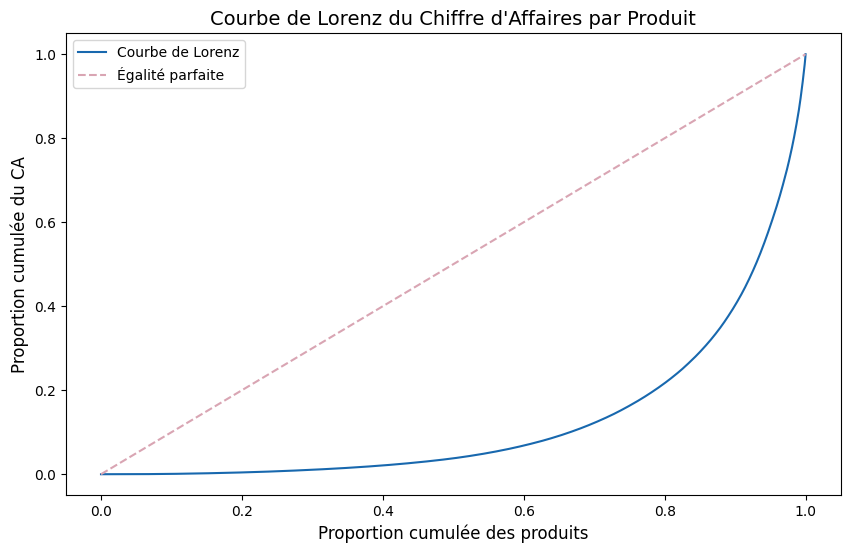

Indice de Gini : 0.7439186789060905


In [ ]:
# Calcul du CA par produit
ca_par_produit = df_lapage.groupby('id_prod')['price'].sum()

# Trier les produits par CA
ca_par_produit_sorted = ca_par_produit.sort_values()

# Calculer la somme cumulée du CA et la somme totale du CA
ca_cumsum = ca_par_produit_sorted.cumsum()
ca_total = ca_par_produit_sorted.sum()

# Calculer la proportion cumulée des produits et du CA
proportion_produits = np.linspace(0, 1, len(ca_par_produit_sorted))
proportion_ca = ca_cumsum / ca_total

# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(proportion_produits, proportion_ca, label='Courbe de Lorenz', color='#1868ae')
plt.plot([0, 1], [0, 1], linestyle='--', color='#d9a5b3', label='Égalité parfaite')

# Ajouter des labels et un titre
plt.title("Courbe de Lorenz du Chiffre d'Affaires par Produit", fontsize=14)
plt.xlabel("Proportion cumulée des produits", fontsize=12)
plt.ylabel("Proportion cumulée du CA", fontsize=12)
plt.legend()

# Afficher la courbe
plt.show()

# Calcul de l'indice de Gini
AUC = np.trapz(proportion_ca, proportion_produits)  # Calcul de l'aire sous la courbe de Lorenz
indice_de_gini = 1 - 2 * AUC  # Formule pour obtenir l'indice de Gini

print(f"Indice de Gini : {indice_de_gini}")

L'indice de Gini de 0.74 quantifie l'inégalité, tandis que la courbe de Lorenz montre visuellement cette concentration de chiffre d'affaires dans une petite partie des produits. La courbe est presque plate pendant une grande partie avant de monter brusquement, cela reflète un 80/20 classique : une minorité de produits génère la majorité du chiffre d'affaires.

##**Etape 6** - Analyses des ventes

###Évolution des Ventes par Catégorie

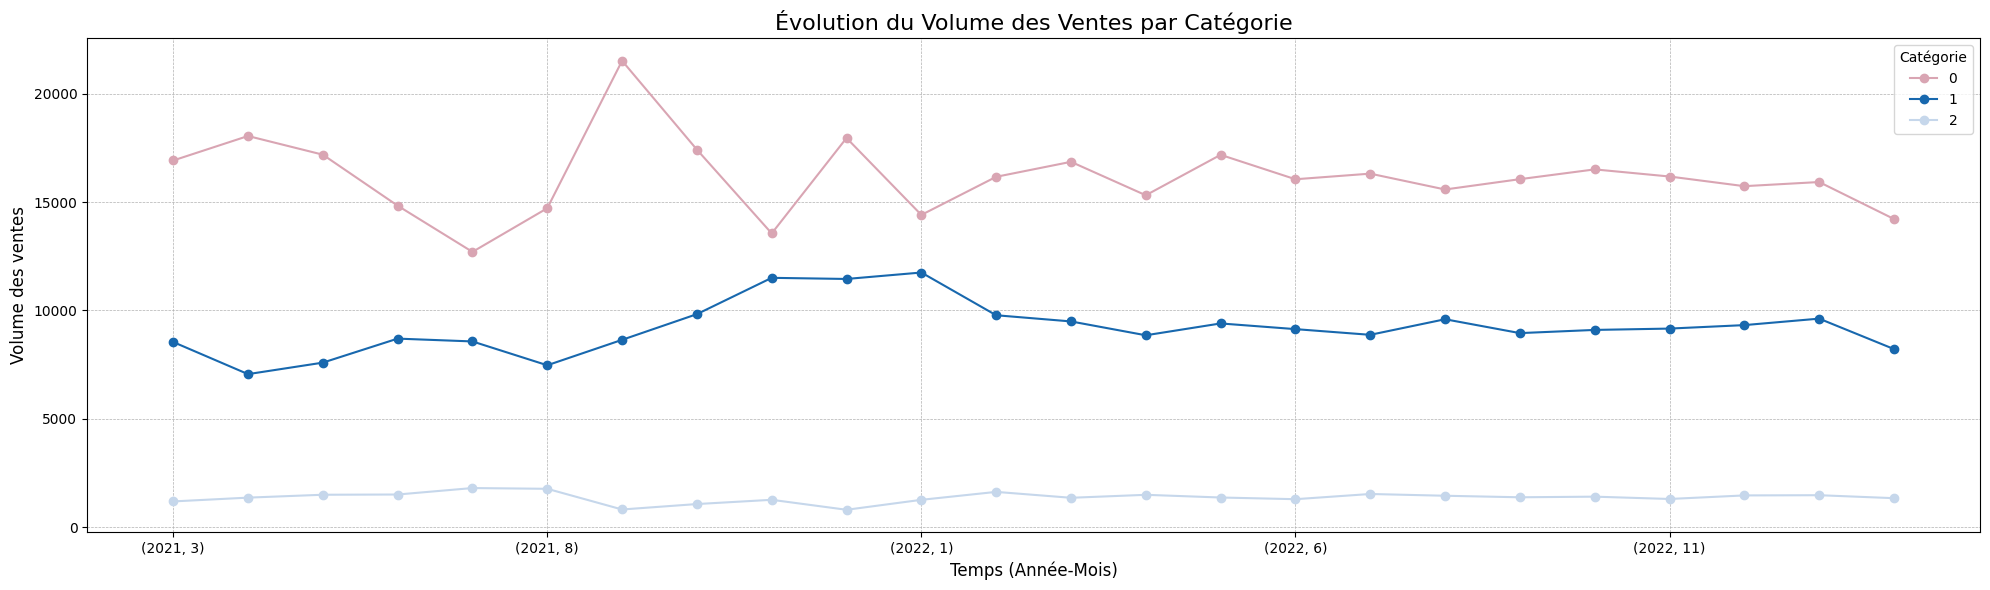

In [ ]:
# Agrégation du volume des ventes par mois et catégorie
ventes_par_categ_volume = df_lapage_wo_btob.groupby(["annee", "mois", "categ"])["id_prod"].count().unstack()

# Création du line chart pour visualiser le volume des ventes par mois et par catégorie
ventes_par_categ_volume.plot(kind='line', figsize=(20, 6), color=['#d9a5b3', '#1868ae', '#c6d7eb'], marker='o')

# Ajout des labels et du titre
plt.xlabel("Temps (Année-Mois)", fontsize=12)
plt.ylabel("Volume des ventes", fontsize=12)
plt.title("Évolution du Volume des Ventes par Catégorie", fontsize=16)

# Ajout de la légende pour chaque catégorie
plt.legend(title="Catégorie", fontsize=10)

# Ajout d'une grille
plt.grid(True, linestyle='--', linewidth=0.5)

# Ajustement des espacements
plt.tight_layout()

# Affichage du graphique
plt.show()


Les courbes de vente sont linéaires dans le temps, traduisant une stabilité des
volumes de vente qui suit une logique cohérente avec le positionnement des catégories, de la moins chère à la plus chère.

###TOP et FLOP références (nombre de ventes)

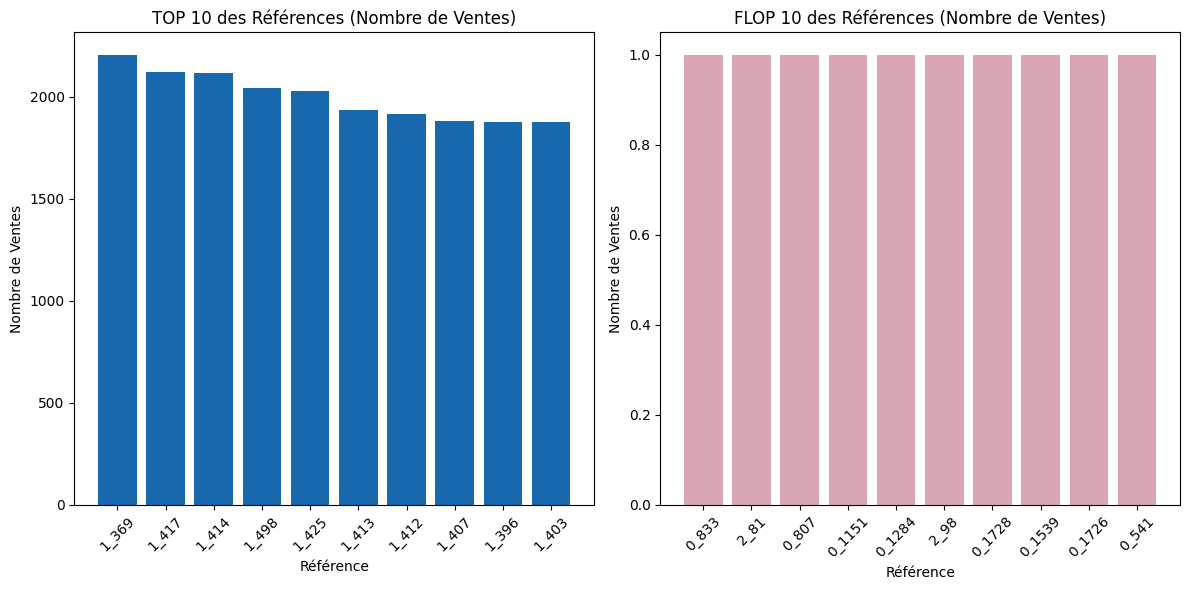

In [ ]:
# Calcul du nombre de ventes par référence
ventes_par_ref = df_lapage_wo_btob.groupby('id_prod')['price'].count().reset_index()

# Renommer les colonnes pour plus de clarté
ventes_par_ref.columns = ['Référence', 'Nombre de Ventes']

# Trier par nombre de ventes décroissant (TOP 10) et croissant (FLOP 10)
top_10_ventes = ventes_par_ref.sort_values(by='Nombre de Ventes', ascending=False).head(10)
flop_10_ventes = ventes_par_ref.sort_values(by='Nombre de Ventes', ascending=True).head(10)

# Création du graphique
plt.figure(figsize=(12, 6))

# Bar chart pour le TOP 10
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er graphique
plt.bar(top_10_ventes['Référence'], top_10_ventes['Nombre de Ventes'], color='#1868ae')
plt.title('TOP 10 des Références (Nombre de Ventes)')
plt.xlabel('Référence')
plt.ylabel('Nombre de Ventes')
plt.xticks(rotation=45)

# Bar chart pour le FLOP 10
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2ème graphique
plt.bar(flop_10_ventes['Référence'], flop_10_ventes['Nombre de Ventes'], color='#d9a5b3')
plt.title('FLOP 10 des Références (Nombre de Ventes)')
plt.xlabel('Référence')
plt.ylabel('Nombre de Ventes')
plt.xticks(rotation=45)

# Ajustements
plt.tight_layout()
plt.show()

**TOP** : La différence entre le produit le plus vendu (2205 ventes) et le moins vendu (1874 ventes) est 331 unités. Cette variation reste relativement modérée. Tous sont de la catégorie 1.

**FLOP** : Tous les produits font 1 vente seulement, 9/10 de la catégorie 0 (la moins chère) et un produit de la catégorie 2 (haut de gamme).

**Nous ne comptons pas ici les 21 produits qui n'ont généré aucune vente.**

##**Etape 7** - Analyses des catégories


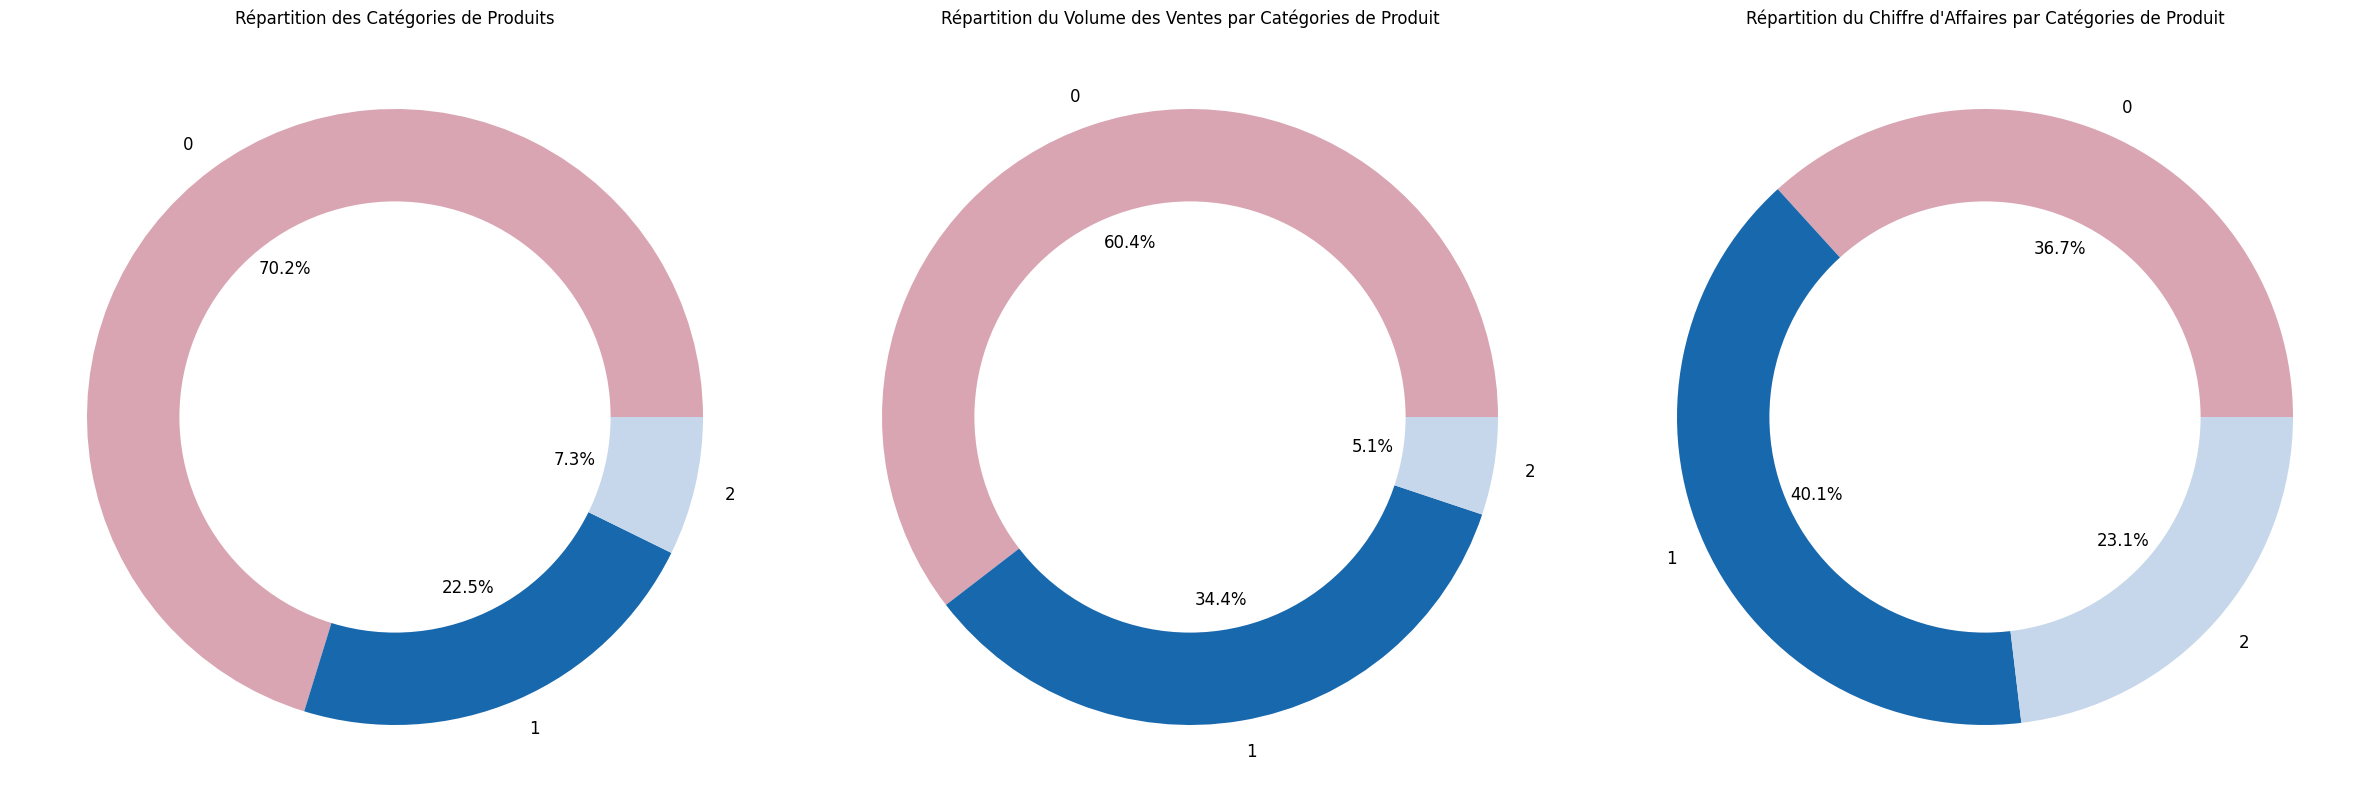

In [ ]:
# Définition de la figure avec 3 sous-graphes dans une disposition de 1x3 (1 ligne, 3 colonnes)
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Graphique 1 : Répartition des catégories de produits
df_products['categ'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', colors=['#d9a5b3', '#1868ae', '#c6d7eb'],
    textprops={'fontsize': 12, 'color': 'black'}, ax=axes[0]
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[0].add_artist(centre_circle)
axes[0].set_ylabel('')  # Retirer l'étiquette par défaut
axes[0].set_title("Répartition des Catégories de Produits")

# Graphique 2 : Répartition du Volume des Ventes par Catégories de Produit
volume_par_categ = df_lapage_wo_btob.groupby('categ')['id_prod'].count()
volume_par_categ.plot(
    kind='pie', autopct='%1.1f%%', colors=['#d9a5b3', '#1868ae', '#c6d7eb'],
    textprops={'fontsize': 12, 'color': 'black'}, ax=axes[1]
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)
axes[1].set_ylabel('')  # Retirer l'étiquette par défaut
axes[1].set_title("Répartition du Volume des Ventes par Catégories de Produit")

# Graphique 3 : Répartition du Chiffre d'Affaires par Catégories de Produit
ca_par_categ = df_lapage.groupby('categ')['price'].sum()
ca_par_categ.plot(
    kind='pie', autopct='%1.1f%%', colors=['#d9a5b3', '#1868ae', '#c6d7eb'],
    textprops={'fontsize': 12, 'color': 'black'}, ax=axes[2]
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[2].add_artist(centre_circle)
axes[2].set_ylabel('')  # Retirer l'étiquette par défaut
axes[2].set_title("Répartition du Chiffre d'Affaires par Catégories de Produit")

# Ajustement pour éviter le chevauchement des éléments
plt.tight_layout()

# Affichage de la figure avec les trois graphiques côte à côte
plt.show()


**Catégorie 0** : Large gamme, mais moins rentable.

**Catégorie 1** : Performante sur tous les aspects, elle combine des ventes solides et un CA élevé..

**Catégorie 2** : Petite mais lucrative. Représente une niche avec des produits haut de gamme ou spécifiques.

##**Etape 8** - Analyses des clients

###Distribution des Âges

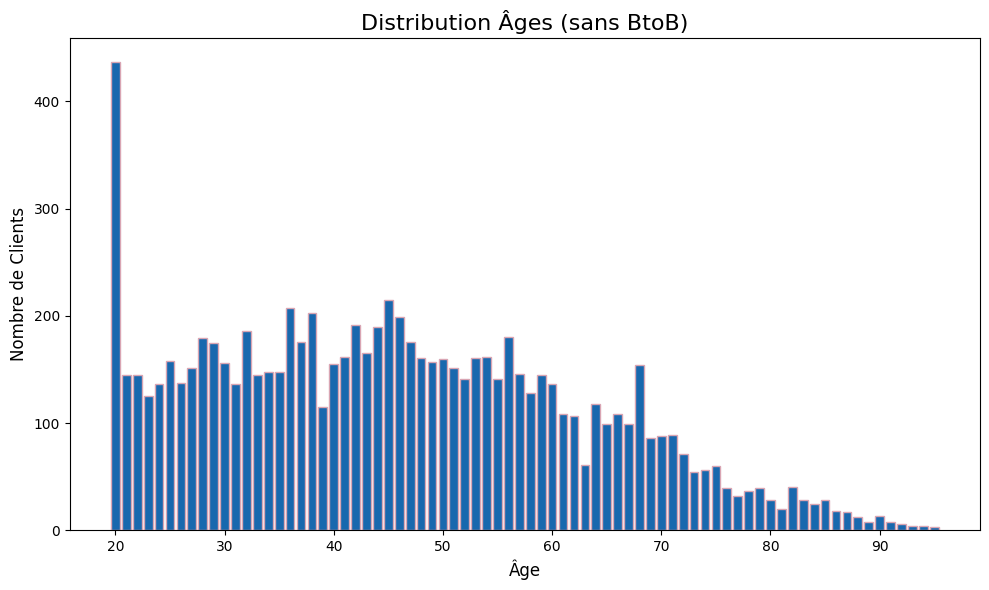

In [ ]:
# Création d'un DataFrame unique pour chaque client
df_unique_clients = df_lapage_wo_btob[['client_id', 'age']].drop_duplicates()

# Comptage du nombre de clients uniques par âge
age_counts = df_unique_clients['age'].value_counts().sort_index()

# Création d'un graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='#1868ae', edgecolor='#d9a5b3')

# Ajout de titres et labels
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Nombre de Clients", fontsize=12)
plt.title("Distribution Âges (sans BtoB)", fontsize=16)

# Ajustement de la mise en page
plt.tight_layout()
plt.show()

Pic sur 20 ans, age auto sur le site ?
Hormis cela, la population est bien répartie avec une baisse au delà de 60 ans.

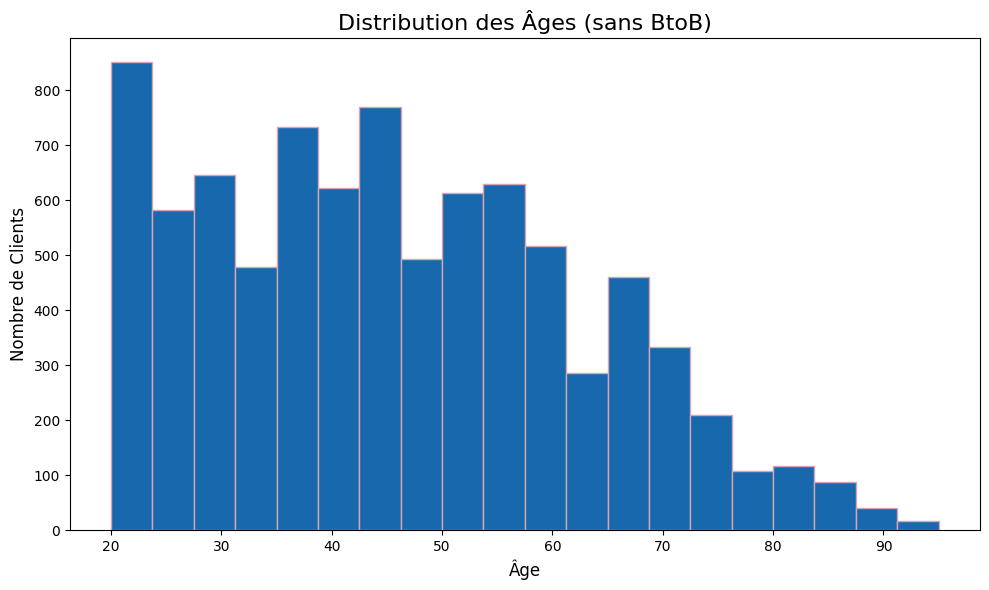

,age
count,8596.000000
mean,45.739646
std,16.910542
min,20.000000
25%,32.000000
50%,45.000000
75%,58.000000
max,95.000000


In [ ]:
# Création d'un histogramme pour la distribution des âges
plt.figure(figsize=(10, 6))
plt.hist(df_unique_clients['age'], bins=20, color='#1868ae', edgecolor='#d9a5b3')

# Ajout de titres et labels
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Nombre de Clients", fontsize=12)
plt.title("Distribution des Âges (sans BtoB)", fontsize=16)

# Ajustement de la mise en page
plt.tight_layout()
plt.show()

df_unique_clients.describe()

La distribution semble centrée autour de 45 ans (moyenne et médiane proches). Cela suggère que la plupart des clients ont des âges compris entre 32 et 58 ans (plage interquartile).
La présence d'un écart type relativement élevé (16,91 ans) indique une population de clients assez variée, allant de jeunes adultes à des personnes âgées.

###Répartition des Clients par Tranches d'âges

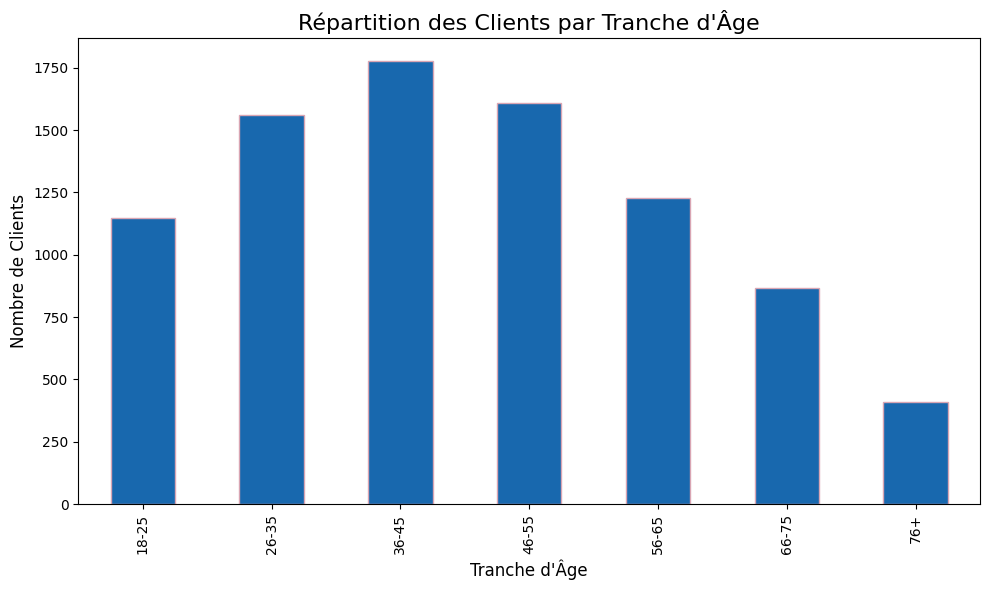

,count
tranche_age,
18-25,1146
26-35,1561
36-45,1779
46-55,1609
56-65,1228
66-75,865
76+,408


In [ ]:
# Répartition des clients uniques par tranche d'âge
clients_par_tranche_age = df_lapage_wo_btob[['client_id', 'tranche_age']].drop_duplicates()['tranche_age'].value_counts().sort_index()

# Graphique
plt.figure(figsize=(10, 6))
clients_par_tranche_age.plot(kind='bar', color='#1868ae', edgecolor='#d9a5b3')
plt.xlabel("Tranche d'Âge", fontsize=12)
plt.ylabel("Nombre de Clients", fontsize=12)
plt.title("Répartition des Clients par Tranche d'Âge", fontsize=16)
plt.tight_layout()
plt.show()

clients_par_tranche_age

La majorité des clients se situent dans les tranches actives 26-45 ans, représentant environ 39 % du total.
Les 46-55 ans constituent également un groupe important (près de 19 %), ce qui montre une transition vers une clientèle un peu plus âgée mais toujours active.
Les jeunes (18-25 ans) et les seniors (66+ ans) représentent des populations plus réduites mais significatives.

###Nombre de Clients par Catégorie

categ
0    7892
1    8455
2    3593
Name: client_id, dtype: int64


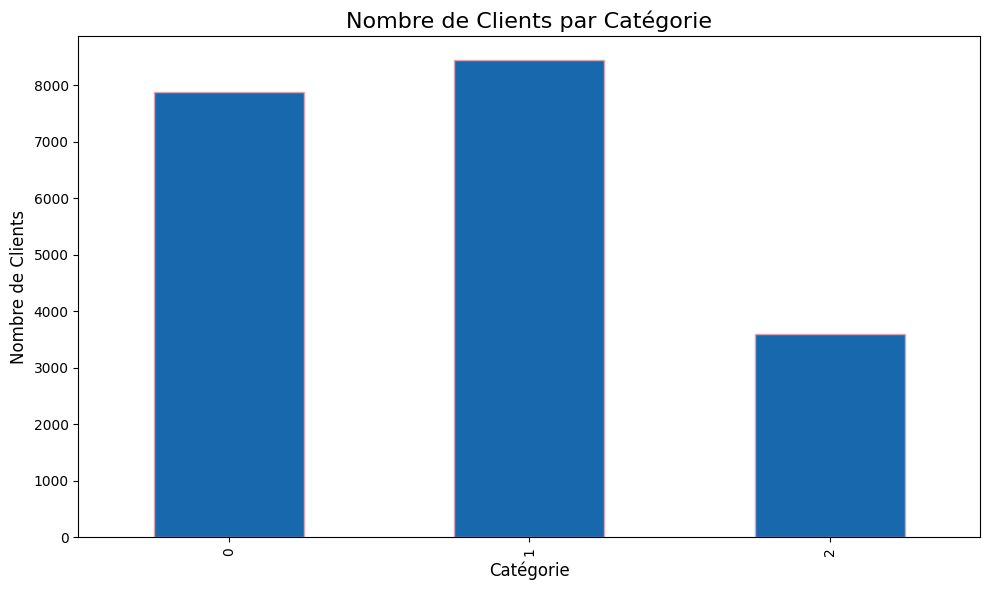

In [ ]:
# Calcul du nombre de clients uniques par catégorie
clients_par_categ = df_lapage_wo_btob.groupby('categ')['client_id'].nunique()

# Affichage
print(clients_par_categ)

# Graphique
plt.figure(figsize=(10, 6))
clients_par_categ.plot(kind='bar', color='#1868ae', edgecolor='#d9a5b3')
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Nombre de Clients", fontsize=12)
plt.title("Nombre de Clients par Catégorie", fontsize=16)
plt.tight_layout()
plt.show()

Catégorie 1 est la plus populaire avec 8455 clients, suivie par la catégorie 0 avec 7892 clients.
Catégorie 2 a moins de clients, avec seulement 3593 clients.

###Fréquence d'achats des Clients

count    8596.000000
mean       37.513495
std        30.898817
min         1.000000
25%        15.000000
50%        27.000000
75%        50.000000
max       167.000000
Name: session_id, dtype: float64


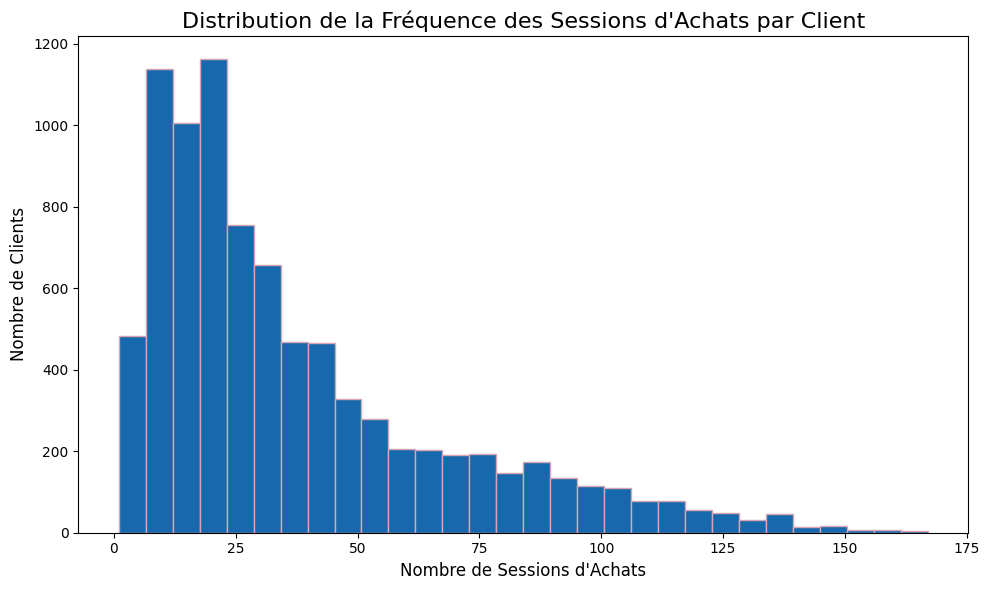

In [ ]:
# Groupement par client_id et session_id pour obtenir le nombre de sessions par client
sessions_achats = df_lapage_wo_btob.groupby('client_id')['session_id'].nunique()

# Statistiques descriptives sur les sessions
print(sessions_achats.describe())

# Graphique : Distribution de la fréquence des sessions d'achats
plt.figure(figsize=(10, 6))
plt.hist(sessions_achats, bins=30, color='#1868ae', edgecolor='#d9a5b3')
plt.xlabel("Nombre de Sessions d'Achats", fontsize=12)
plt.ylabel("Nombre de Clients", fontsize=12)
plt.title("Distribution de la Fréquence des Sessions d'Achats par Client", fontsize=16)
plt.tight_layout()
plt.show()

La majorité des clients effectuent un nombre relativement faible d'achats, avec un maximum à 167. La moyenne de 37 achats indique que certains clients achètent régulièrement, mais beaucoup d'autres ont une fréquence d'achat bien plus basse (en raison du faible 1er quartile).
Il semble y avoir une disparité importante entre les clients les plus fréquents et ceux qui achètent moins souvent, ce qui est confirmé par l'écart type élevé.

##**Etape 9** - Analyses bivariées

### Sexe/Catégorie (quali/quali, chi-2)

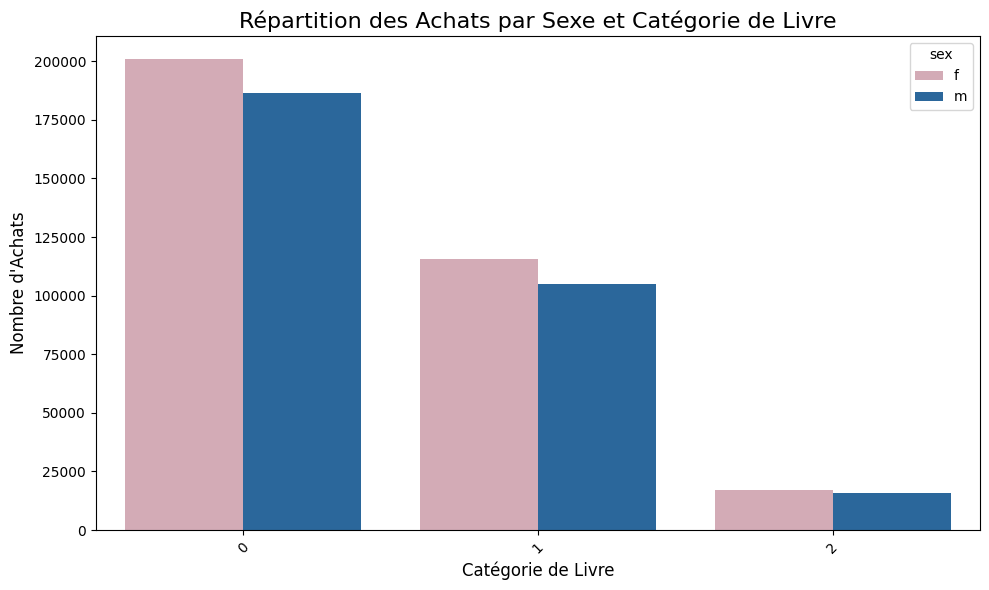

In [ ]:
# Grouper par sexe et catégorie pour compter les occurrences
df_sex_categ = df_lapage_wo_btob.groupby(['sex', 'categ']).size().reset_index(name='count')

# Création du bar chart groupé
plt.figure(figsize=(10, 6))
sns.barplot(x='categ', y='count', hue='sex', data=df_sex_categ, palette=['#d9a5b3', '#1868ae'])

# Ajouter les labels et le titre
plt.xlabel("Catégorie de Livre", fontsize=12)
plt.ylabel("Nombre d'Achats", fontsize=12)
plt.title("Répartition des Achats par Sexe et Catégorie de Livre", fontsize=16)

# Affichage du graphique
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La répartition des sexes montre des différences légères selon les catégories, avec une domination globale des femmes dans toutes les catégories. Cependant, ces variations ne permettent pas de conclure directement à une association entre le sexe et les catégories de livres. Pour confirmer s'il existe une relation significative entre ces deux variables qualitatives ou si la répartition est indépendante des catégories, nous allons effectuer un test du Chi-2.

Chi2 Statistique: 22.66856665178056
P-value: 1.1955928116587024e-05
Degrés de liberté: 2
Tableau des valeurs attendues :
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]
V de Cramer: 0.005948029928802536


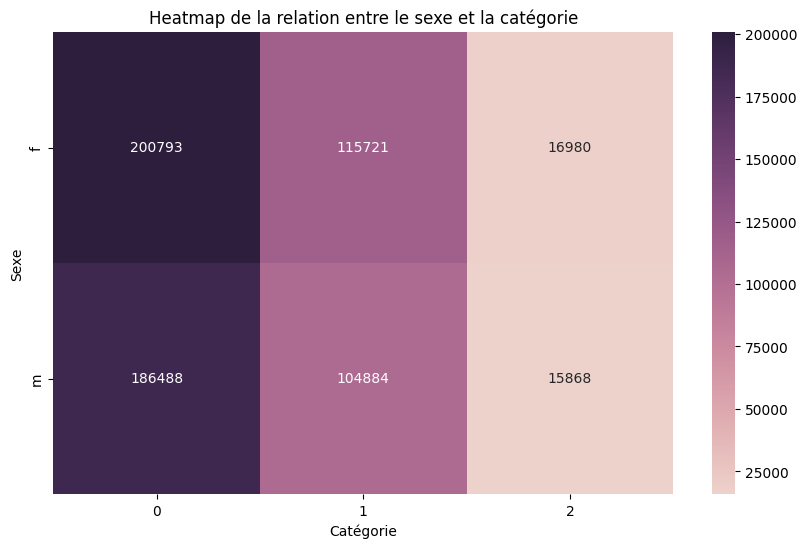

categ,0,1,2
sex,,,
f,200793,115721,16980
m,186488,104884,15868


In [ ]:
from scipy.stats import chi2_contingency

# 1. Créer un tableau de contingence
contingency_table = pd.crosstab(df_lapage_wo_btob['sex'], df_lapage_wo_btob['categ'])

# 2. Effectuer le test du chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print(f"Chi2 Statistique: {chi2}")
print(f"P-value: {p}")
print(f"Degrés de liberté: {dof}")
print("Tableau des valeurs attendues :")
print(expected)

# 3. Calculer le V de Cramer
n = contingency_table.sum().sum()  # Taille totale de l'échantillon
min_dim = min(contingency_table.shape) - 1  # Min(k-1, r-1)
v_cramer = np.sqrt(chi2 / (n * min_dim))

# Afficher le résultat du V de Cramer
print(f"V de Cramer: {v_cramer}")

# 3. Visualiser les résultats avec une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Heatmap de la relation entre le sexe et la catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Sexe')
plt.show()
contingency_table

L'analyse a examiné la relation entre le sexe (sex) et la catégorie (categ) via un test du chi-2 :

**Chi-2 : 22.67**

**P-value : 1.20 × 10⁻⁵ (significatif, p < 0.05)**

**V de Cramer : 0.0059**

Les résultats indiquent une corrélation significative entre le sexe et la catégorie de livres, ce qui suggère que la répartition des sexes n'est pas totalement indépendante des catégories. Cependant, la valeur du V de Cramer est très faible (0.0059), ce qui indique que même si la relation est statistiquement significative, son intensité est négligeable. Autrement dit, l'effet de l'association entre le sexe et les catégories de livres est extrêmement faible en pratique.

La heatmap visualise les écarts entre les fréquences observées et les fréquences attendues, mettant en évidence les segments où ces différences sont les plus marquées.

###CA/age (quanti/quanti, Spearman)

Avant de mener cette analyse, il est essentiel de vérifier si la variable **âge** suit une distribution normale. Pour cela, nous allons utiliser le test de **Shapiro-Wilk**, qui permet d'évaluer la normalité d'une variable. Si l'âge ne suit pas une loi normale, cela orientera notre choix vers des tests non paramétriques, plus adaptés pour analyser les données.

In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(df_lapage_wo_btob['age'])

# Afficher les résultats
print(f"Statistique du test de Shapiro-Wilk : {stat}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Statistique du test de Shapiro-Wilk : 0.9720600857954291
Valeur p : 5.03147747285959e-110
Les données ne suivent pas une distribution normale (on rejette H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 640734.
  res = hypotest_fun_out(*samples, **kwds)


La **p-value**, étant très faible (inférieure à 0,05), nous permet de rejeter l'hypothèse nulle selon laquelle la variable age suit une distribution normale. Par conséquent, pour les analyses futures impliquant cette variable, nous privilégierons des tests non paramétriques.

Ainsi, au lieu d'utiliser un test **ANOVA** (adapté aux données normalement distribuées), nous opterons pour le test de **corrélation de Spearman**, qui ne nécessite pas de normalité.

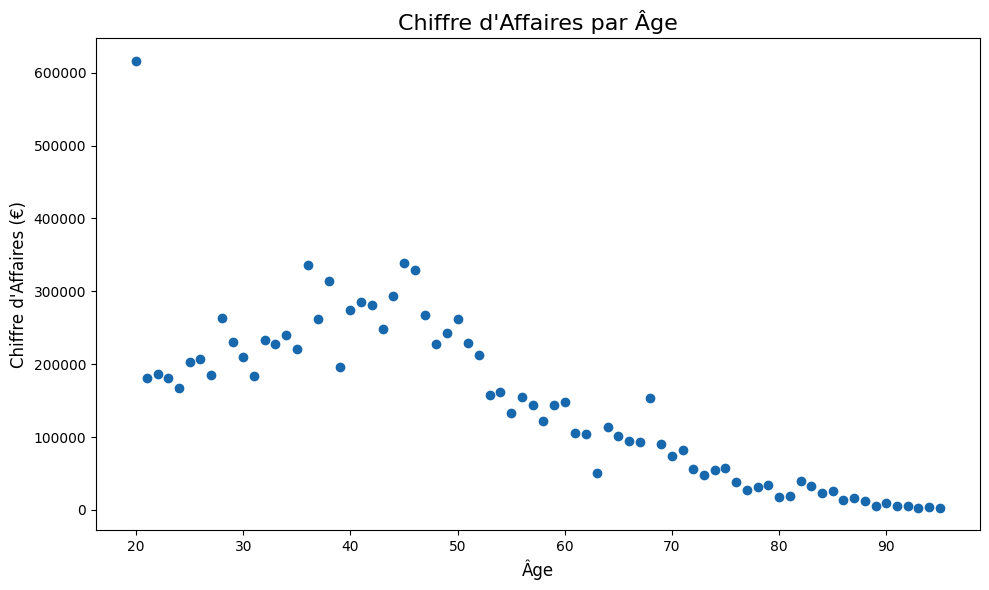

In [ ]:
# Grouper par âge et calculer le total du chiffre d'affaires
ca_par_age = df_lapage_wo_btob.groupby('age')['price'].sum().reset_index()
# Création du scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ca_par_age['age'], ca_par_age['price'], color='#1868ae')

# Ajouter des labels et un titre
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Chiffre d'Affaires (€)", fontsize=12)
plt.title("Chiffre d'Affaires par Âge", fontsize=16)

# Affichage du graphique
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import spearmanr

# Supposons que 'age' et 'price' soient des colonnes de ton DataFrame
corr_coefficient, p_value = spearmanr(ca_par_age['age'], ca_par_age['price'])

print(f"Coefficient de corrélation de Spearman: {corr_coefficient}")
print(f"P-value: {p_value}")

Coefficient de corrélation de Spearman: -0.8744497607655503
P-value: 5.956077505475151e-25


Le coefficient de **corrélation de Spearman**, de **-0.874**, indique une forte corrélation négative entre l'âge des clients et le chiffre d'affaires. Cela suggère que, **plus les clients sont âgés, moins ils génèrent de chiffre d'affaires.**

Avec une **p-value** extrêmement faible (**5.96 × 10⁻²⁵**), cette relation est **statistiquement significative**, confirmant qu'il est très peu probable que cette corrélation soit due au hasard.

**En conclusion**, l'âge semble jouer un rôle clé dans les comportements d'achat, avec une tendance marquée à une diminution des dépenses chez les clients plus âgés.

###Fréquence d'achat/Age (quanti/quanti, Spearman)

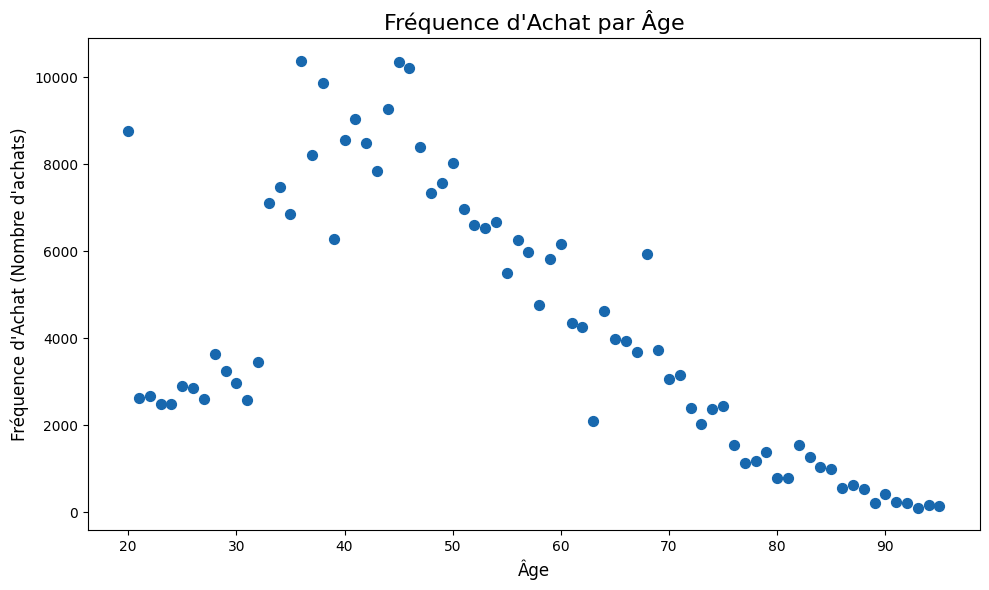

In [ ]:
# Grouper par âge et calculer la fréquence d'achat (nombre d'achats par âge)
frequence_par_age = df_lapage_wo_btob.groupby('age')['session_id'].nunique().reset_index(name='frequence_achat')

# Création du scatter plot pour la fréquence d'achat par âge
plt.figure(figsize=(10, 6))
plt.scatter(frequence_par_age['age'], frequence_par_age['frequence_achat'], color='#1868ae', s=50)

# Ajouter des labels et un titre
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Fréquence d'Achat (Nombre d'achats)", fontsize=12)
plt.title("Fréquence d'Achat par Âge", fontsize=16)

# Affichage du graphique
plt.tight_layout()
plt.show()

In [ ]:
# Calcul de la corrélation de Spearman entre l'âge et la fréquence d'achat
correlation, p_value = spearmanr(frequence_par_age['age'], frequence_par_age['frequence_achat'])
print(f"Coefficient de corrélation de Spearman: {correlation}")
print(f"P-value: {p_value}")


Coefficient de corrélation de Spearman: -0.6593848257006152
P-value: 9.36237939303452e-11


Le coefficient de **corrélation de Spearman** de **-0.659** révèle une corrélation négative modérée entre l'âge et la fréquence d'achat. Cela suggère qu'en général, **à mesure que l'âge augmente, la fréquence d'achat diminue**, bien que cette relation ne soit pas strictement linéaire.

La **p-value** extrêmement faible (**9.36 × 10⁻¹¹**) confirme la **significativité statistique** de cette corrélation. Nous pouvons donc rejeter l'hypothèse nulle, ce qui valide l'existence d'une relation inverse entre ces deux variables.

Cependant, un coefficient de -0.66 montre qu'il existe une variabilité non expliquée par cette relation seule. Cela indique que d'autres facteurs pourraient également influencer la fréquence d'achat et mériteraient d'être explorés dans des analyses futures.

###panier moyen/Age (quanti/quanti, Pearson ou Spearman)

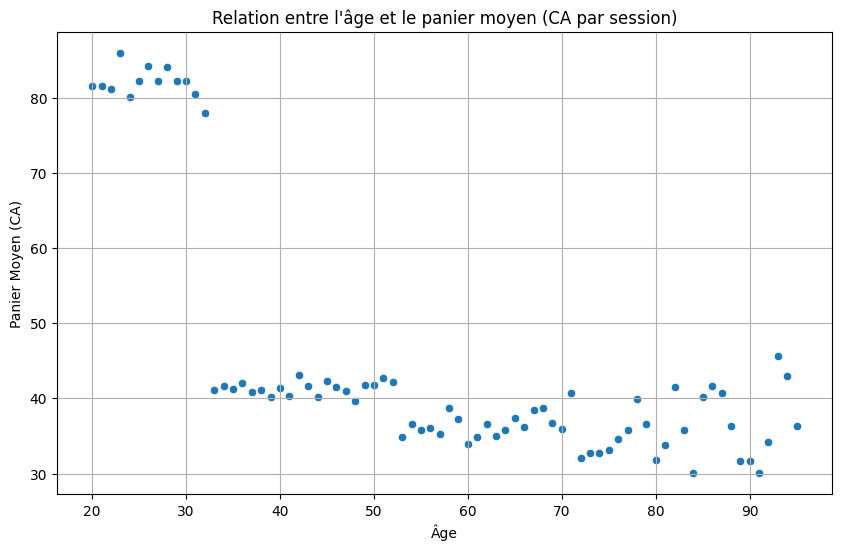

In [ ]:
# Calculer le chiffre d'affaires total par session
chiffre_affaires_par_session = df_lapage_wo_btob.groupby('session_id')['price'].sum().reset_index()
chiffre_affaires_par_session.columns = ['session_id', 'total_CA']

# Joindre le total_CA avec df_lapage_wo_btob pour obtenir l'âge associé à chaque session
df_session_age = pd.merge(chiffre_affaires_par_session, df_lapage_wo_btob[['session_id', 'client_id', 'age']], on='session_id')

# Calculer le panier moyen par âge
panier_moyen_par_age = df_session_age.groupby('age')['total_CA'].mean().reset_index()
panier_moyen_par_age.columns = ['age', 'panier_moyen']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=panier_moyen_par_age, x='age', y='panier_moyen')
plt.title('Relation entre l\'âge et le panier moyen (CA par session)')
plt.xlabel('Âge')
plt.ylabel('Panier Moyen (CA)')
plt.grid()
plt.show()

In [ ]:
# Calculer le coefficient de corrélation de Spearman
spearman_coefficient, p_value = spearmanr(panier_moyen_par_age['age'], panier_moyen_par_age['panier_moyen'])

print(f"Coefficient de Spearman: {spearman_coefficient}, P-value: {p_value}")

Coefficient de Spearman: -0.6969514695830484, P-value: 2.6947347656670307e-12


Le coefficient de **corrélation de Spearman**, de **-0.6969**, indique une forte corrélation négative entre l'âge des clients et le panier moyen. Cela suggère que, **plus les clients sont âgés, moins leur panier moyen est élevé.**

Avec une **p-value** extrêmement faible (**2.69 × 10⁻¹²**), cette relation est statistiquement significative, confirmant qu'il est très peu probable que cette corrélation soit due au hasard.

**En conclusion**, l'âge semble avoir un impact notable sur les comportements d'achat, avec une tendance à la diminution du panier moyen chez les clients plus âgés.

###Catégorie/Age (quali/quanti, Krusal-Wallis)

<ipython-input-57-9b7dccb7a476>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lapage_wo_btob, y='categ', x='age', orient='h', showfliers=False, showmeans=True,


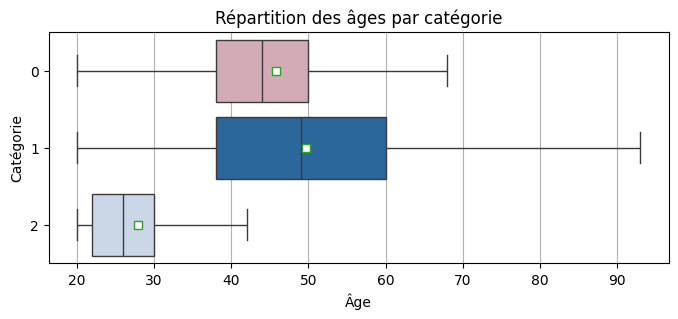

   categ     count       mean        std   min   25%   50%   75%   max
0      0  387281.0  45.794563  11.516110  20.0  38.0  44.0  50.0  95.0
1      1  220605.0  49.650035  15.824496  20.0  38.0  49.0  60.0  95.0
2      2   32848.0  27.965508   9.899864  20.0  22.0  26.0  30.0  95.0


In [ ]:
plt.figure(figsize=(8, 3))

sns.boxplot(data=df_lapage_wo_btob, y='categ', x='age', orient='h', showfliers=False, showmeans=True,
            palette=['#d9a5b3', '#1868ae', '#c6d7eb'], meanprops={"marker": "s", "markerfacecolor": "white"})

plt.title('Répartition des âges par catégorie')
plt.xlabel('Âge')
plt.ylabel('Catégorie')
plt.grid(axis='x')
plt.show()

# Statistiques descriptives de l'âge par catégorie
age_par_categ = df_lapage_wo_btob.groupby('categ')['age'].describe().reset_index()
print(age_par_categ)

In [ ]:
from scipy.stats import kruskal

# Effectuer le test de Kruskal-Wallis pour la variable 'age' en fonction des groupes 'categ'
kruskal_statistic, kruskal_p_value = kruskal(*(df_lapage_wo_btob[df_lapage_wo_btob['categ'] == cat]['age'] for cat in df_lapage_wo_btob['categ'].unique()))

print(f"Statistique de Kruskal-Wallis : {kruskal_statistic}, P-value : {kruskal_p_value}")


Statistique de Kruskal-Wallis : 71359.73412120914, P-value : 0.0


In [ ]:
# Effectuer le test de Kruskal-Wallis
kruskal_result = kruskal(
    df_lapage_wo_btob[df_lapage_wo_btob['categ'] == 0]['age'],
    df_lapage_wo_btob[df_lapage_wo_btob['categ'] == 1]['age'],
    df_lapage_wo_btob[df_lapage_wo_btob['categ'] == 2]['age']
)

print(f"Statistique H : {kruskal_result.statistic}")
print(f"p-value : {kruskal_result.pvalue}")


Statistique H : 71359.73412120914
p-value : 0.0


In [ ]:
!pip install scikit-posthocs

In [ ]:
from scikit_posthocs import posthoc_dunn

# Test post-hoc de Dunn avec correction de Bonferroni
posthoc_results = posthoc_dunn(
    df_lapage_wo_btob,
    val_col='age',
    group_col='categ',
    p_adjust='bonferroni'
)

print(posthoc_results)

     0    1    2
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0


La statistique H de **Kruskal-Wallis**, égale à **71359.73**, indique une différence significative entre les groupes en termes d'âge. Cela suggère que **l'âge des individus dans au moins une des catégories diffère de manière marquée par rapport aux autres groupes**.

Avec une **p-value** de **0.0**, cette différence est **extrêmement significative**, ce qui confirme qu'il est hautement improbable que cette variation d'âge soit due au hasard.

**En conclusion**, les résultats suggèrent que l'âge joue un rôle déterminant dans la séparation des groupes, avec des différences d'âge statistiquement significatives entre les catégories.

## **Conclusion générale :**

L’analyse du **chiffre d’affaires** entre 2021 et 2023 montre une **stabilité (+0,27%)**, mais souligne des **dynamiques contrastées** selon les catégories :

  •	**Catégorie 0** (prix moyen 10€) : 37% du CA, mais dépend trop du volume (60%) avec une rentabilité limitée.

  •	**Catégorie 1** (prix moyen 20€) : 40% du CA et un équilibre volumes/catalogue, elle est **le pilier de l’offre**.

  •	**Catégorie 2** (prix moyen 76€) : 23% du CA avec seulement 5% des ventes, une forte valeur ajoutée mais faible contribution en volume.

Les **Tops/Flops** ainsi que la courbe de **Lorenz CA/Produits** renforcent cette conclusion.
Différentes stratégies marketing et une offre produits à revoir sur les **catégories 0 et 2** seraient nécessaires.

Les analyses clients révèlent un lien important entre **l'âge des clients** et **leurs comportements d'achat** :

  •	Une diminution du **chiffre d'affaires**, du **panier moyen** et de la **fréquence d'achat** avec l’âge.

  •	Des **différences marquées** entre les catégories, suggérant que l’âge est un facteur clé à intégrer dans la segmentation et les actions ciblées.

##**Bonus** - RFM

In [ ]:
# Récence : Dernière date d'achat
recence = df_lapage_wo_btob.groupby('client_id')['date_heure'].max().apply(lambda x: (df_lapage_wo_btob['date_heure'].max() - x).days)

# Fréquence : Nombre d'achats
frequence = df_lapage_wo_btob['client_id'].value_counts()

# Valeur : Total dépensé
valeur = df_lapage_wo_btob.groupby('client_id')['price'].sum()

# Création du DataFrame RFM
rfm = pd.DataFrame({'Récence': recence, 'Fréquence': frequence, 'Valeur': valeur})

# Affichage des premières lignes
print(rfm.head())

In [ ]:
# Calcul des scores pour chaque dimension
rfm['R_Score'] = pd.qcut(rfm['Récence'], q=4, labels=[4, 3, 2, 1])  # Plus récent = meilleur score
rfm['F_Score'] = pd.qcut(rfm['Fréquence'], q=4, labels=[1, 2, 3, 4])  # Plus fréquent = meilleur score
rfm['M_Score'] = pd.qcut(rfm['Valeur'], q=4, labels=[1, 2, 3, 4])  # Plus dépensé = meilleur score

# Score RFM global
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Affichage des premières lignes
print(rfm.head())

In [ ]:
# Création des segments
def segmenter_client(row):
    if row['RFM_Score'] == '444':
        return 'Champions'
    elif row['R_Score'] == 4:
        return 'Récents'
    elif row['F_Score'] == 4:
        return 'Fidèles'
    elif row['M_Score'] == 4:
        return 'Grands Dépenseurs'
    elif row['R_Score'] <= 2:
        return 'À Risque'
    else:
        return 'Standard'

rfm['Segment'] = rfm.apply(segmenter_client, axis=1)

# Affichage de la répartition des segments
print(rfm['Segment'].value_counts())

In [ ]:
# Répartition des segments
plt.figure(figsize=(10, 6))
rfm['Segment'].value_counts().plot(kind='bar', color='#1868ae', edgecolor='#d9a5b3')
plt.title("Répartition des Segments Clients", fontsize=16)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Nombre de Clients", fontsize=12)
plt.tight_layout()
plt.show()

**À Risque** (3602 clients) :

Ces clients ont une faible récence (ils n'ont pas effectué d'achat récent), une fréquence ou une valeur d'achat moins élevée. Cela signifie qu'ils sont susceptibles de se désengager.

**Récents** (1526 clients) :

Ce sont des clients qui ont effectué des achats récents, mais avec une fréquence ou une valeur moins élevée. Ils sont nouveaux et ont montré de l'intérêt, mais leurs achats ne sont pas encore suffisamment fréquents ou importants.

**Standard** (1152 clients) :

Ces clients ont des comportements d'achat modérés, avec une fréquence et une valeur moyennes. Ils ne sont ni à risque, ni particulièrement fidèles.

**Fidèles** (1047 clients) :

Les clients fidèles effectuent des achats réguliers et ont une bonne fréquence d'achat, bien que leur dépense totale ne soit pas élevée.

**Champions** (856 clients) :

Ce segment regroupe les clients les plus engagés, ceux qui ont la meilleure récence, fréquence et valeur d'achat.

**Grands Dépenseurs** (413 clients) :

Ces clients dépensent beaucoup, mais leur fréquence d'achat n'est peut-être pas aussi élevée que celle des champions. Ils peuvent être des clients occasionnels mais qui effectuent des achats de grande valeur.

Le segment "**À Risque**" est le plus grand, indiquant qu'il y a une large base de clients qui ne sont plus très engagés.

Les "**Champions**" et les "**Grands Dépenseurs**" sont plus petits, mais essentiels pour les revenus, représentant un segment à fidéliser.

Les "**Récents" et "Fidèles**" sont des segments intermédiaires qui nécessitent une attention particulière pour les convertir en clients plus engagés.

In [ ]:
# Contribution des segments au chiffre d'affaires
revenu_par_segment = rfm.groupby('Segment')['Valeur'].sum().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
revenu_par_segment.plot(kind='bar', color='#1868ae', edgecolor='#d9a5b3')
plt.title("Chiffre d'Affaires par Segment", fontsize=16)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Chiffre d'Affaires (€)", fontsize=12)
plt.tight_layout()
plt.show()

**À Risque** (2436901.72€) :

Bien que ce segment regroupe les clients les moins engagés, il génère un revenu considérable. Cela peut être dû à un petit nombre de clients ayant effectué des achats importants dans le passé.

**Champions** (2390682.78€) :

Les "Champions" génèrent presque autant de revenus que les clients "À Risque". Cela montre que ce segment est crucial pour l'entreprise, car il regroupe des clients très engagés, qui dépensent beaucoup

**Fidèles** (2345320.19€) :

Les "Fidèles" sont également une source de revenu significative. Bien qu'ils n'achètent pas autant que les "Champions", leur fréquence d'achat régulière contribue à un revenu stable.

**Récents** (1892918.01€) :

Les clients "Récents" génèrent un revenu plus faible, ce qui est compréhensible puisqu'ils sont nouveaux et n'ont pas encore atteint le niveau d'engagement des autres segments.

**Standard** (1040872.49€) :

Ce segment génère le revenu le plus bas parmi tous les segments, ce qui pourrait indiquer que ces clients n'ont pas un comportement d'achat aussi régulier ou une valeur totale élevée.

**Grands Dépenseurs** (1036671.82€) :

Bien que les "Grands Dépenseurs" représentent un petit nombre de clients, ils génèrent un revenu important par achat. Leur faible nombre indique qu'il pourrait s'agir de clients qui font des achats très coûteux, mais peu fréquents.

**Conclusions** :

Les segments "**À Risque**" et "**Champions**" génèrent une proportion comparable de revenus, ce qui montre que même si les clients "**À Risque**" ne sont pas totalement engagés, ils ont généré un revenu important dans le passé. La fidélisation des "**Champions**" et la réactivation des "**À Risque**" devraient être des priorités.

Les "**Fidèles**" apportent également une contribution significative, et maintenir leur fidélité pourrait être crucial pour la stabilité des revenus.

Les "**Récents**" et "**Standard**" génèrent moins de revenus, ce qui reflète leur potentiel de croissance. Ce sont des segments où des stratégies ciblées de réactivation ou d'engagement peuvent être très profitables.

Les "**Grands Dépenseurs**", bien que peu nombreux, représentent une valeur élevée par client, et une attention particulière pourrait être accordée à eux pour les inciter à acheter plus fréquemment.

In [ ]:
# Valeur moyenne par segment
segment_valeur_moyenne = rfm.groupby('Segment')['Valeur'].mean()
print(segment_valeur_moyenne)

# Affichage
plt.figure(figsize=(10, 6))
segment_valeur_moyenne.plot(kind='bar', color='purple')
plt.title('Valeur Moyenne par Segment')
plt.xlabel('Segment')
plt.ylabel('Valeur Moyenne')
plt.xticks(rotation=45)
plt.show()

**Champions** (2792.85) :

Ce segment a la valeur moyenne la plus élevée.
Ces clients effectuent des achats récents, fréquents et d'un montant significatif, ce qui confirme leur importance pour le chiffre d'affaires.


**Grands Dépenseurs** (2510.10) :

Bien que leur récence ou fréquence d'achat puisse être plus faible, leur valeur d'achat reste élevée.


**Fidèles** (2240.04) :

Ce segment a une valeur élevée grâce à leur fréquence d'achat, bien qu'ils puissent ne pas acheter des produits très chers.


**Récents** (1240.44) :

Ces clients ont une valeur moyenne significativement inférieure à celle des segments supérieurs, car ils n'ont pas encore eu l'occasion de multiplier leurs achats.


**Standard** (903.53) :

Ce segment a une valeur relativement faible. Ils achètent de manière occasionnelle et leurs montants sont modestes.


**À Risque** (676.54) :

C'est le segment le moins rentable, avec une valeur moyenne nettement inférieure aux autres.

**Conclusion** :

Fidéliser les **Champions** et **les Grands Dépenseurs**, qui génèrent les revenus les plus élevés.
Transformer les **Récents** et **Standards** en clients réguliers grâce à des stratégies d'engagement.
Réengager les **À Risque** pour réduire les pertes potentielles et améliorer leur contribution globale.

In [ ]:
# Distribution des dépenses par client pour chaque segment
plt.figure(figsize=(10, 6))
for segment in rfm['Segment'].unique():
    subset = rfm[rfm['Segment'] == segment]
    plt.hist(subset['Valeur'], bins=20, alpha=0.6, label=segment)

plt.title('Distribution des Dépenses par Client')
plt.xlabel('Valeur Dépensée')
plt.ylabel('Nombre de Clients')
plt.legend(title='Segment')
plt.show()

In [ ]:
# Valeur totale par segment
segment_valeur_totale = rfm.groupby('Segment')['Valeur'].sum()
print(segment_valeur_totale)

# Affichage
plt.figure(figsize=(10, 6))
segment_valeur_totale.plot(kind='bar', color='cyan')
plt.title('Valeur Totale par Segment')
plt.xlabel('Segment')
plt.ylabel('Valeur Totale')
plt.xticks(rotation=45)
plt.show()

**À Risque** (2,436,901.72) :

Ce segment représente le chiffre d'affaires total le plus élevé, malgré une faible valeur moyenne par client.
Cela s'explique probablement par le grand nombre de clients dans ce segment (3,602).


**Champions** (2,390,682.78) :

Ce segment génère presque autant de chiffre d'affaires total que les "À Risque" mais avec beaucoup moins de clients (856).
Leur contribution au chiffre d'affaires est due à leur engagement élevé et leurs achats fréquents et récents.


**Fidèles** (2,345,320.19) :

Les "Fidèles" se rapprochent des "Champions" en termes de chiffre d'affaires total, malgré des scores RFM légèrement inférieurs.
Leur nombre relativement élevé (1,047) et leur régularité en font un segment essentiel.


**Récents** (1,892,918.01) :

Ce segment génère un chiffre d'affaires significatif, malgré des clients qui viennent d’intégrer la base.
Ils représentent une opportunité de croissance si nous parvenons à les transformer en Fidèles ou Champions.


**Standard** (1,040,872.49) :

Ce segment a un chiffre d'affaires total modéré, reflétant leur comportement d'achat occasionnel.
Leur potentiel de croissance est limité si aucune action n'est prise pour les engager davantage.


**Grands Dépenseurs** (1,036,671.82) :

Bien qu'ils soient moins nombreux (413), leur chiffre d'affaires total est relativement faible par rapport aux autres segments.
Cela pourrait indiquer une moindre fréquence ou récence d'achat.


**Conclusion** :

Les **Champions** et les **Fidèles** génèrent ensemble près de 50 % du chiffre d'affaires total. Ils sont vos segments prioritaires à préserver et à valoriser.
Les **À Risque** représentent une opportunité significative si une stratégie de réactivation est mise en place.
Les **Récents** et **Standards** offrent un potentiel de croissance modéré mais nécessitent une attention particulière pour éviter qu’ils basculent dans le segment "À Risque".
Les **Grands Dépenseurs** doivent être analysés pour comprendre pourquoi leur chiffre d'affaires total est plus faible que celui des autres segments.

In [ ]:
# Fréquence d'achat moyenne par segment
segment_frequence_moyenne = rfm.groupby('Segment')['Fréquence'].mean()
print(segment_frequence_moyenne)

# Affichage
plt.figure(figsize=(10, 6))
segment_frequence_moyenne.plot(kind='bar', color='lightblue')
plt.title('Fréquence d\'Achat Moyenne par Segment')
plt.xlabel('Segment')
plt.ylabel('Fréquence Moyenne')
plt.xticks(rotation=45)
plt.show()

**Champions** (201.27) :

Les Champions se démarquent par la fréquence d'achat la plus élevée parmi tous les segments.
Cela reflète leur engagement exceptionnel, avec des achats réguliers et nombreux.

**Fidèles** (159.52) :

Ce segment a également une fréquence d'achat élevée, bien que légèrement inférieure à celle des Champions.
Ces clients sont essentiels pour la stabilité du chiffre d'affaires.

**Grands Dépenseurs** (55.29) :

Les Grands Dépenseurs, malgré une fréquence relativement faible, se distinguent par leur valeur moyenne élevée par achat.
Leur comportement montre qu'ils achètent moins souvent mais dépensent plus lors de chaque transaction.

**Récents** (63.27) :

Ce segment a une fréquence d'achat supérieure à celle des segments "Standard" et "À Risque", ce qui est prometteur.
Leur engagement récent indique un potentiel pour évoluer vers les segments supérieurs (Fidèles ou Champions).

**Standard** (50.98) :

Ces clients ont une fréquence d'achat modérée, correspondant à un comportement d'achat occasionnel.
Cela limite leur contribution au chiffre d'affaires total, à moins d'actions pour augmenter leur fréquence ou valeur d'achat.

**À Risque** (34.23) :

Les clients À Risque présentent la fréquence d'achat la plus faible, indiquant un désengagement progressif.
Ce segment nécessite une attention particulière pour être réactivé et éviter de les perdre définitivement.



**Conclusion** :
Les **Champions** et **Fidèles** dominent non seulement par leur chiffre d'affaires total, mais aussi par leur fréquence d'achat élevée. Ce sont vos segments les plus précieux.
Les **Grands Dépenseurs** se distinguent par leur valeur élevée mais pourraient générer encore plus de chiffre d'affaires avec une fréquence augmentée.
Les **Récents** sont prometteurs et représentent une opportunité de fidélisation pour consolider leur relation avec votre marque.
Les **Standard** et **À Risque** nécessitent des actions ciblées pour augmenter leur engagement et fréquence d'achat.